In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [3]:
mobile_sales['DATE'].describe()

C:\Users\gaura\AppData\Local\Temp\ipykernel_5756\193277671.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales['DATE'].describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [4]:
mobile_sales.set_index('DATE',inplace=True)

<Axes: xlabel='DATE'>

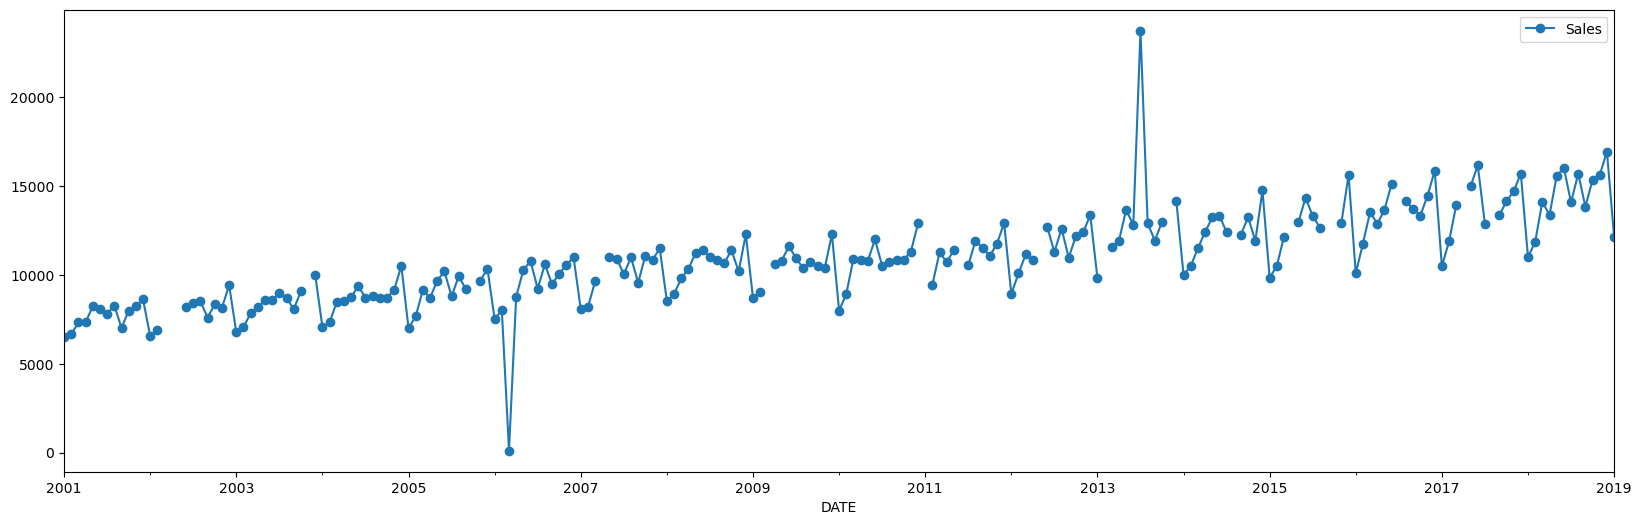

In [5]:
mobile_sales.plot(style='-o')

# Why we should not use mean for imputation?

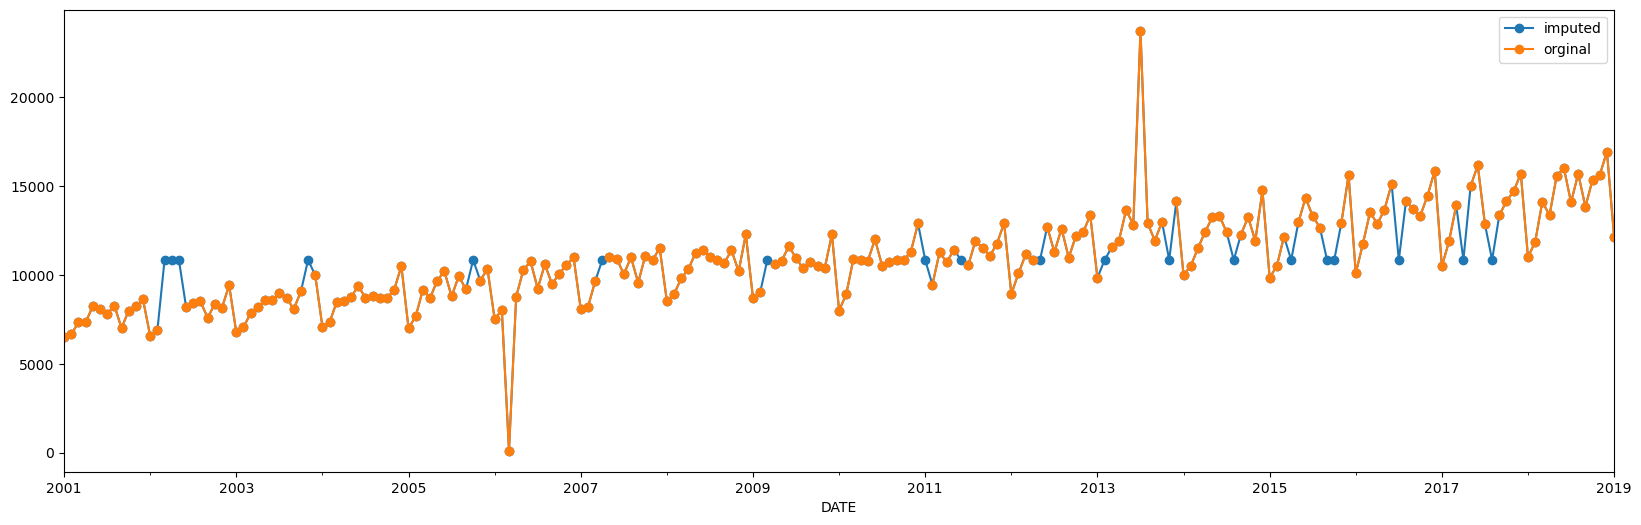

In [6]:
df_mean = mobile_sales['Sales'].mean()
mobile_sales.Sales.fillna(df_mean).plot(style='-o',label='imputed')
mobile_sales.Sales.plot(style='-o',label='orginal')
plt.legend()
plt.show()

# Using Interpolation

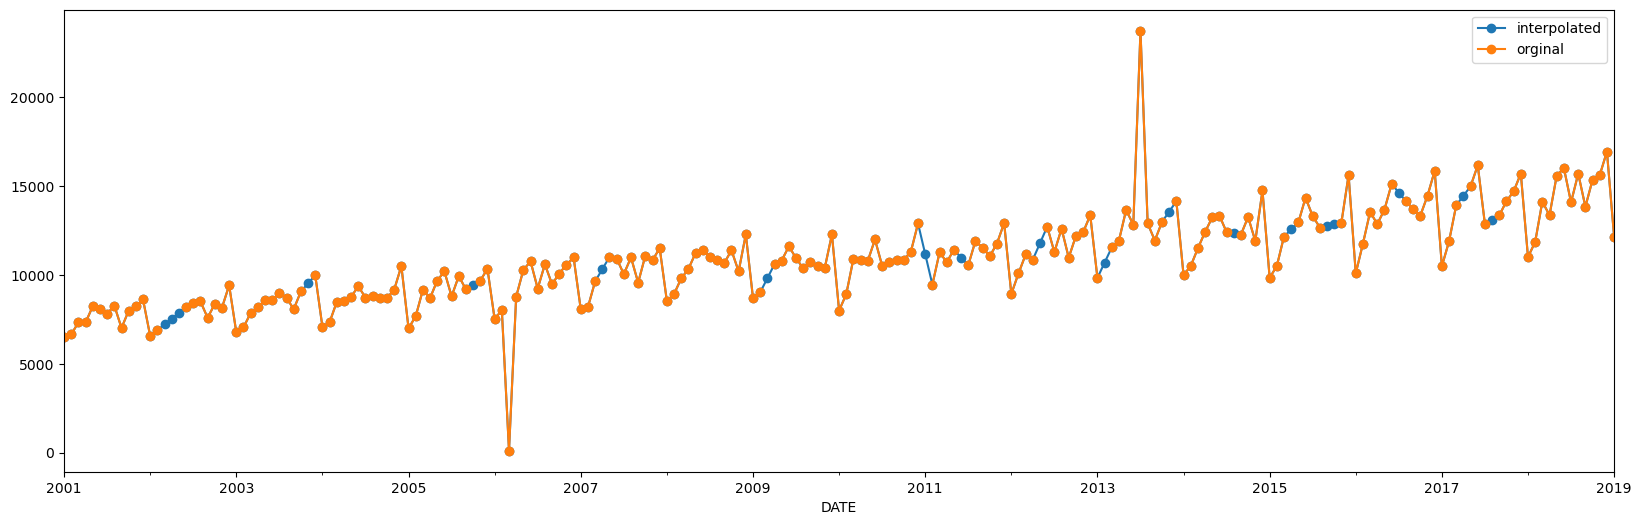

In [7]:
mobile_sales.Sales.interpolate(method='linear').plot(style='-o',label='interpolated')
mobile_sales.Sales.plot(style='-o',label='orginal')
plt.legend()
plt.show()

The Reason Why we should not use Means for imputation because it makes value for inflated which results in worsening the series.

In [8]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper = mobile_sales.Sales.quantile(0.99),lower = mobile_sales.Sales.quantile(0.1))

<Axes: xlabel='DATE'>

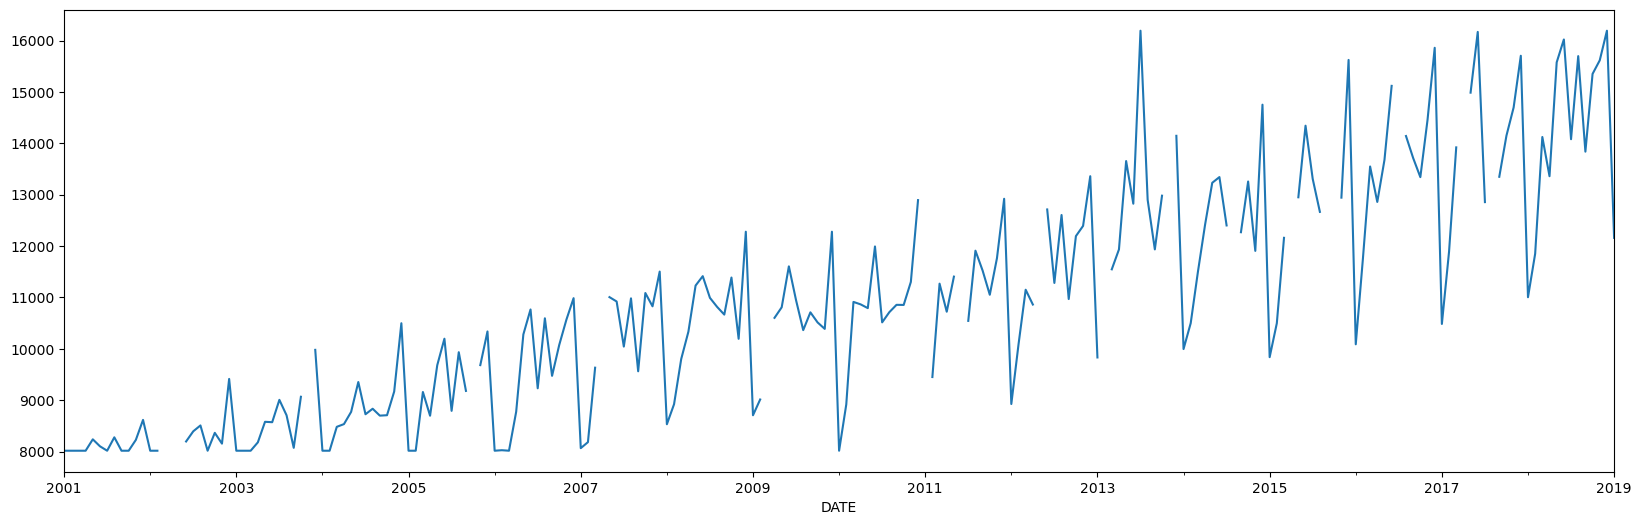

In [9]:
mobile_sales.Sales.plot()

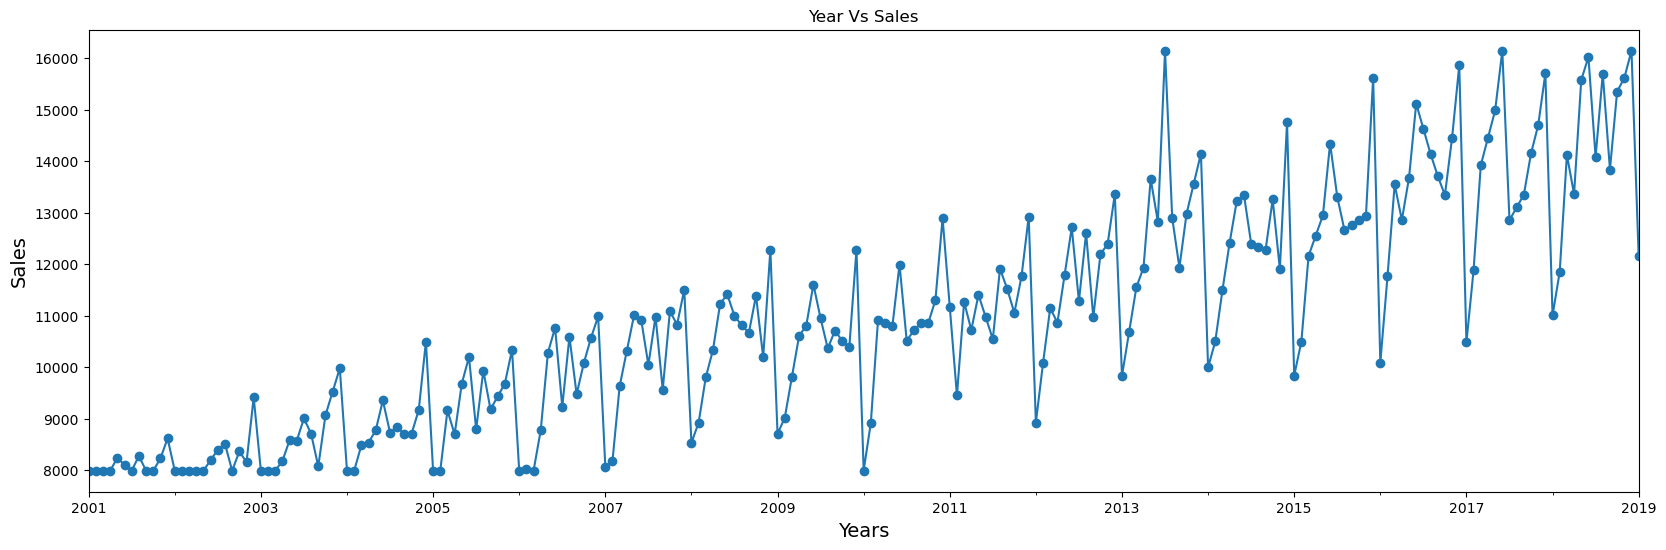

In [10]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE',inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99),lower=mobile_sales.Sales.quantile(0.1))
mobile_sales.Sales.plot(style='-o')
plt.title('Year Vs Sales')
plt.xlabel('Years',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()

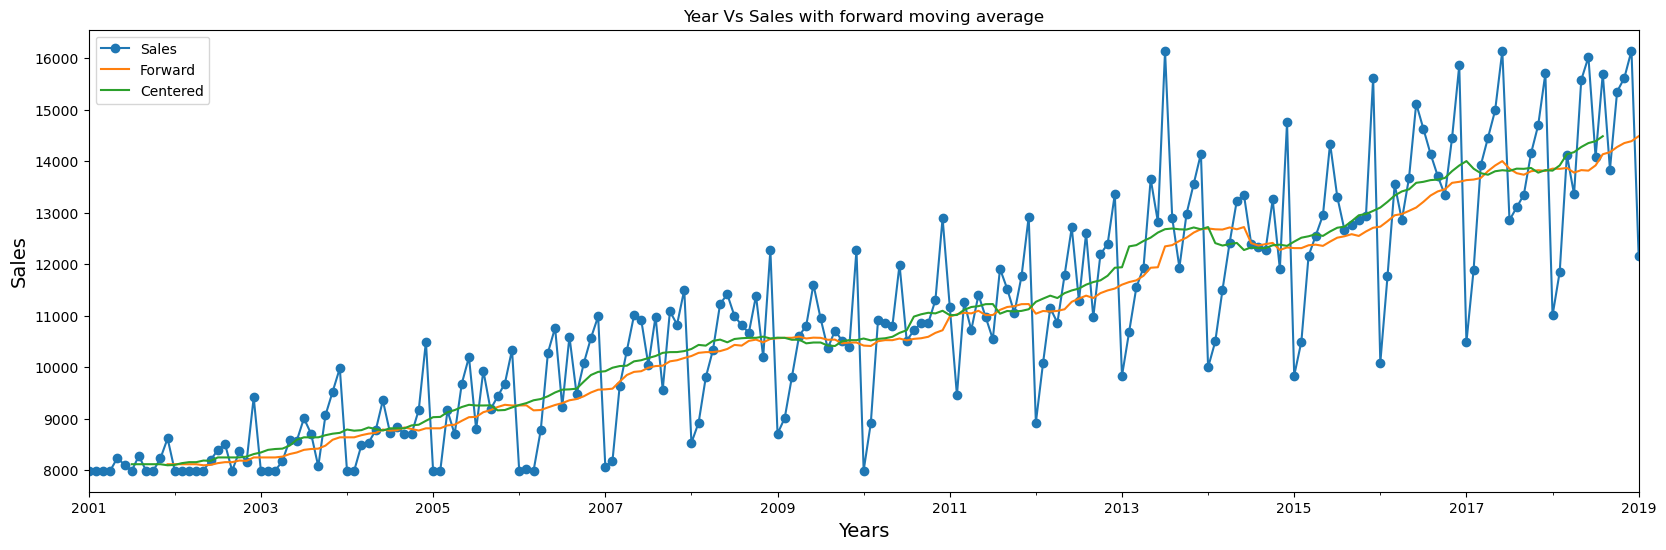

In [11]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12,center=False).mean().plot(label='Forward')
mobile_sales.Sales.rolling(12,center=True).mean().plot(label='Centered')
plt.title('Year Vs Sales with forward moving average')
plt.legend()
plt.xlabel('Years',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()
# Number -> 12 is taken because it is taken like after how many interval data is going to rotate.

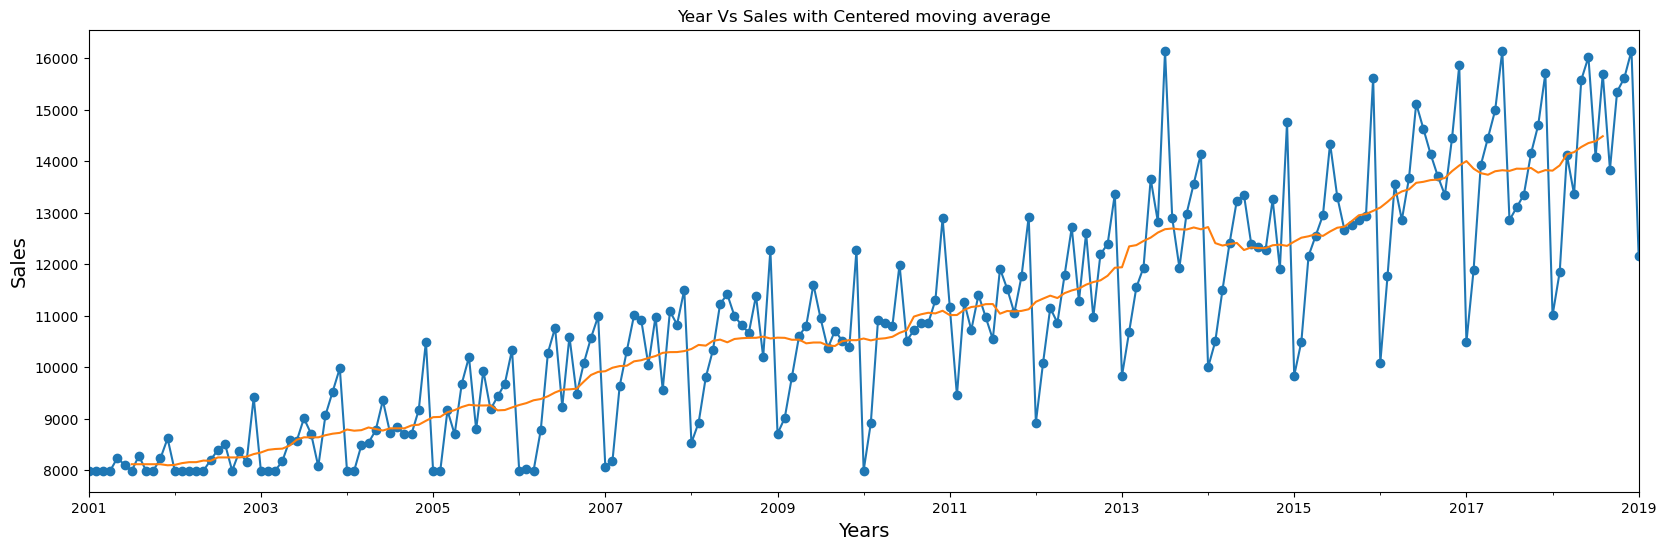

In [12]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12,center=True).mean().plot()
plt.title('Year Vs Sales with Centered moving average')
plt.xlabel('Years',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.show()

In [13]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales,model='additive')

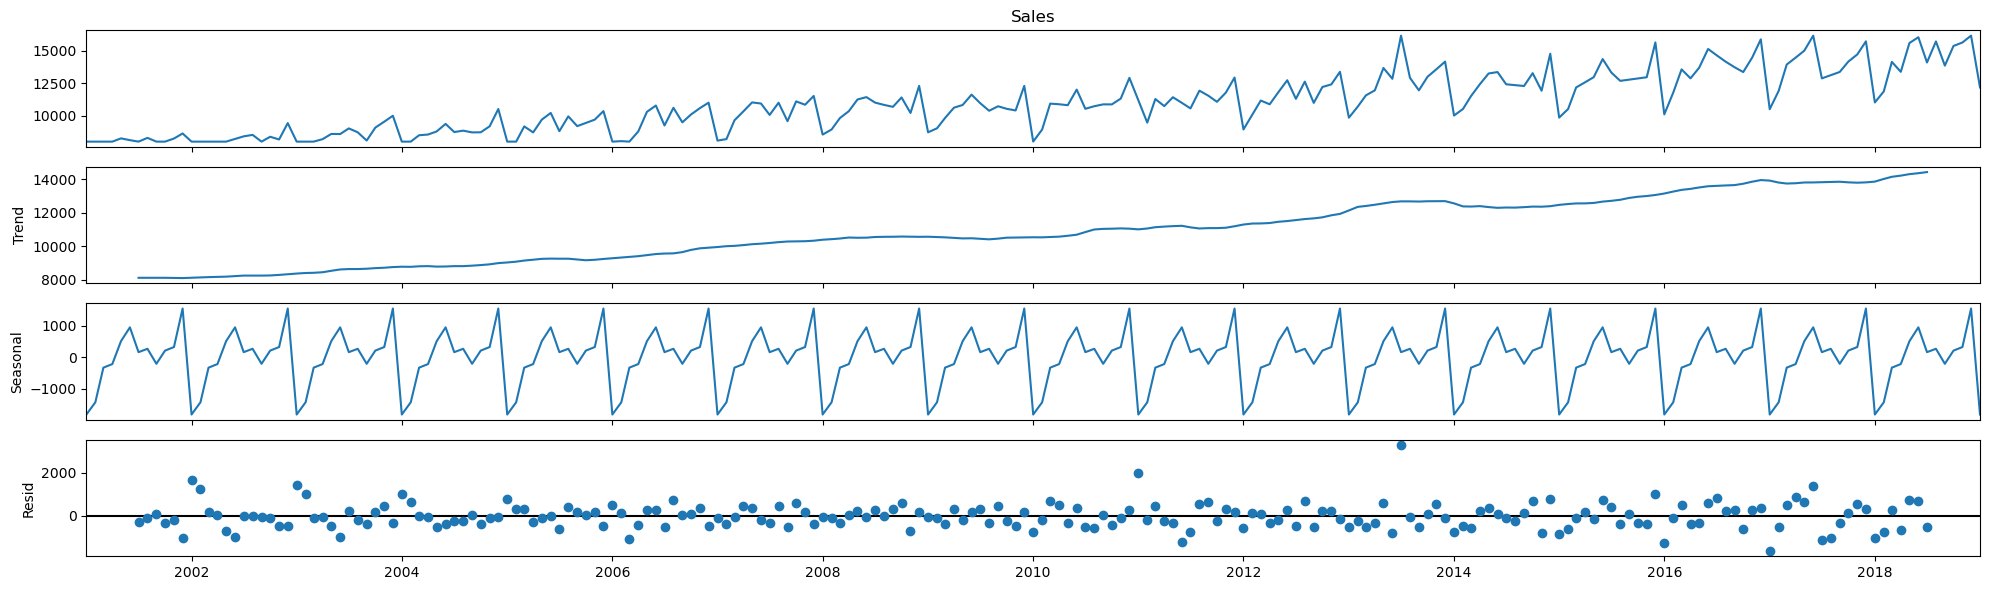

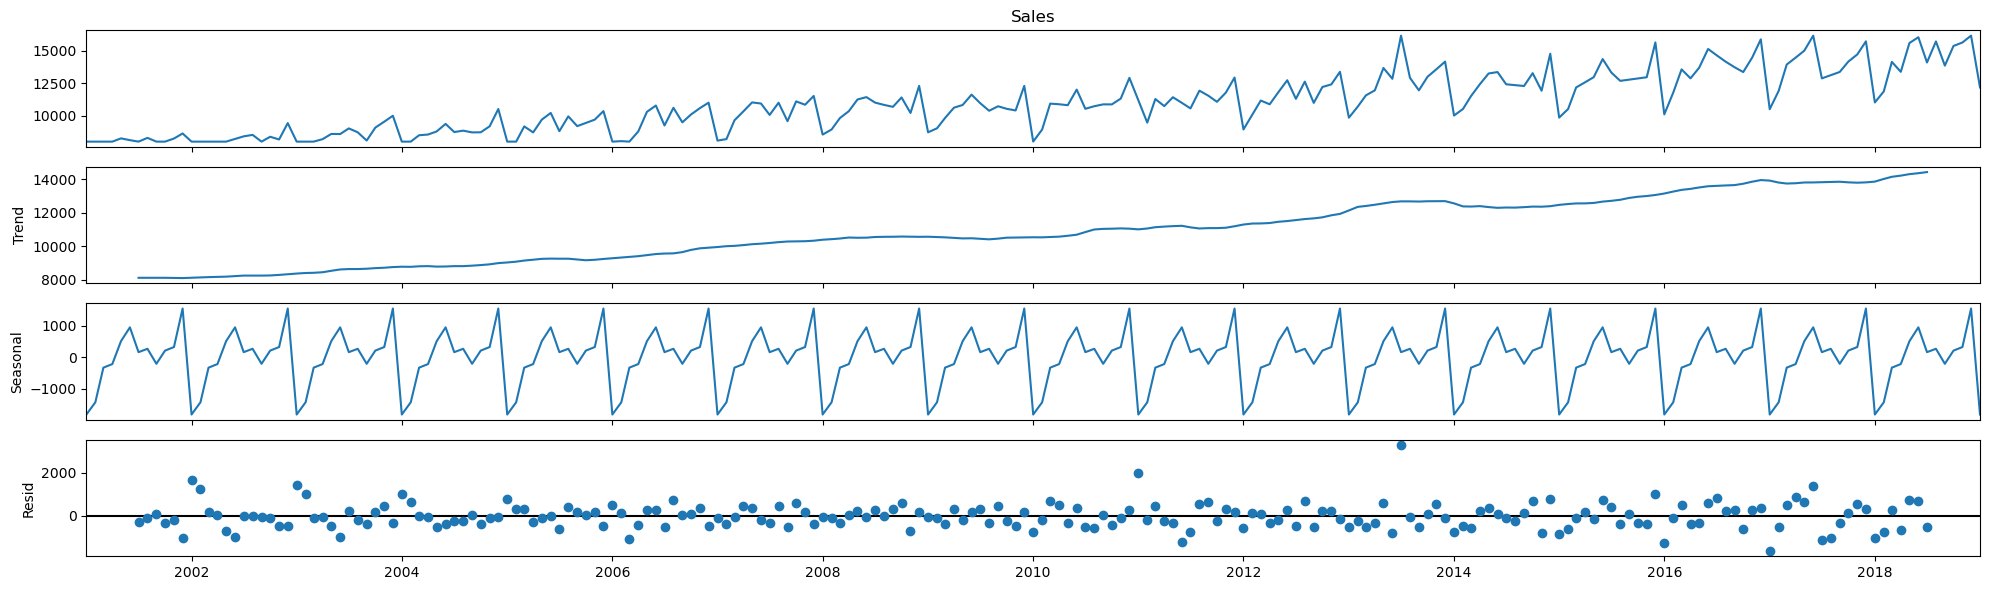

In [14]:
model.plot()

In [15]:
model1 = sm.tsa.seasonal_decompose(mobile_sales.Sales,model='multiplicative')

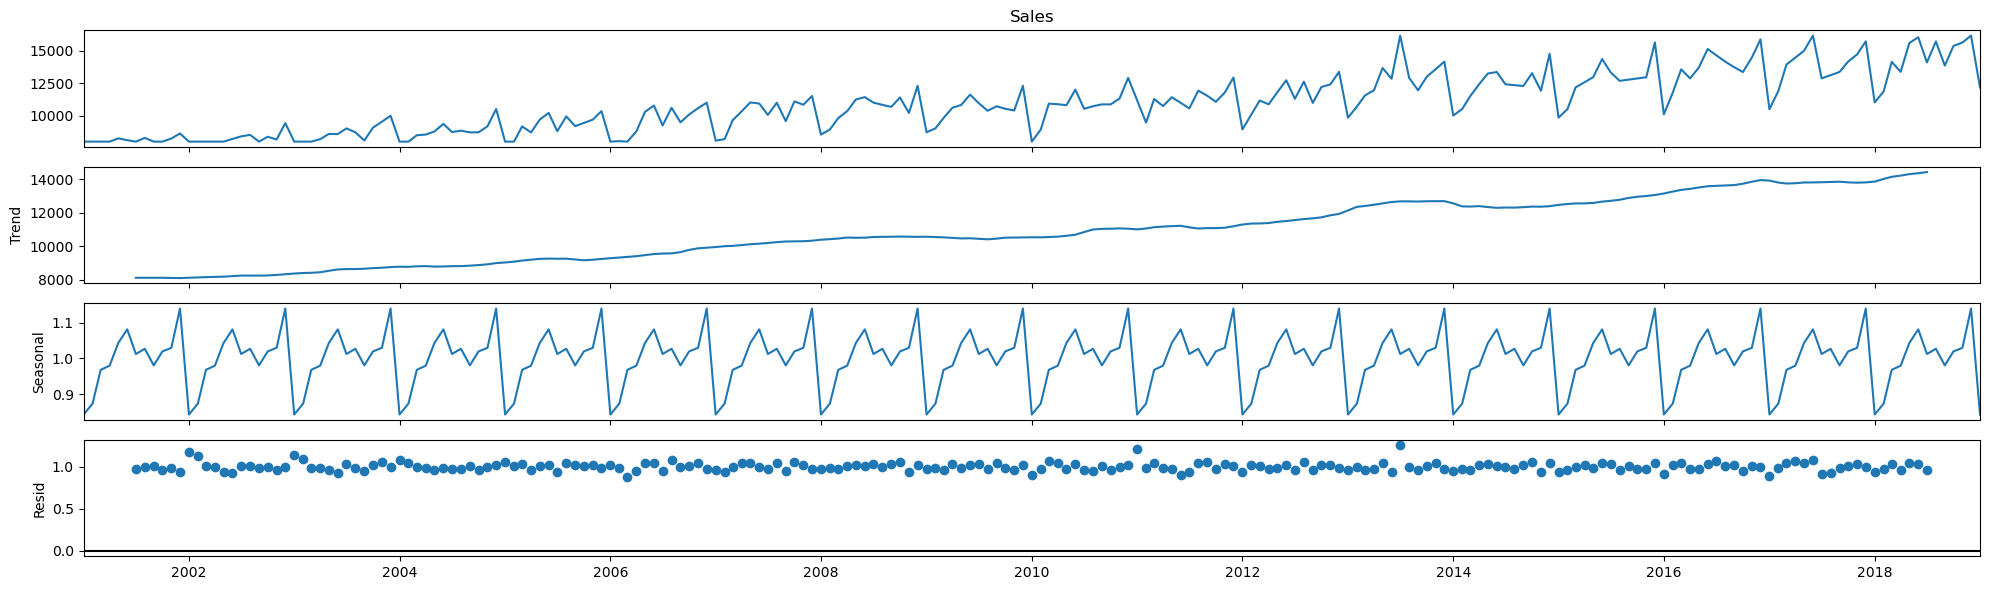

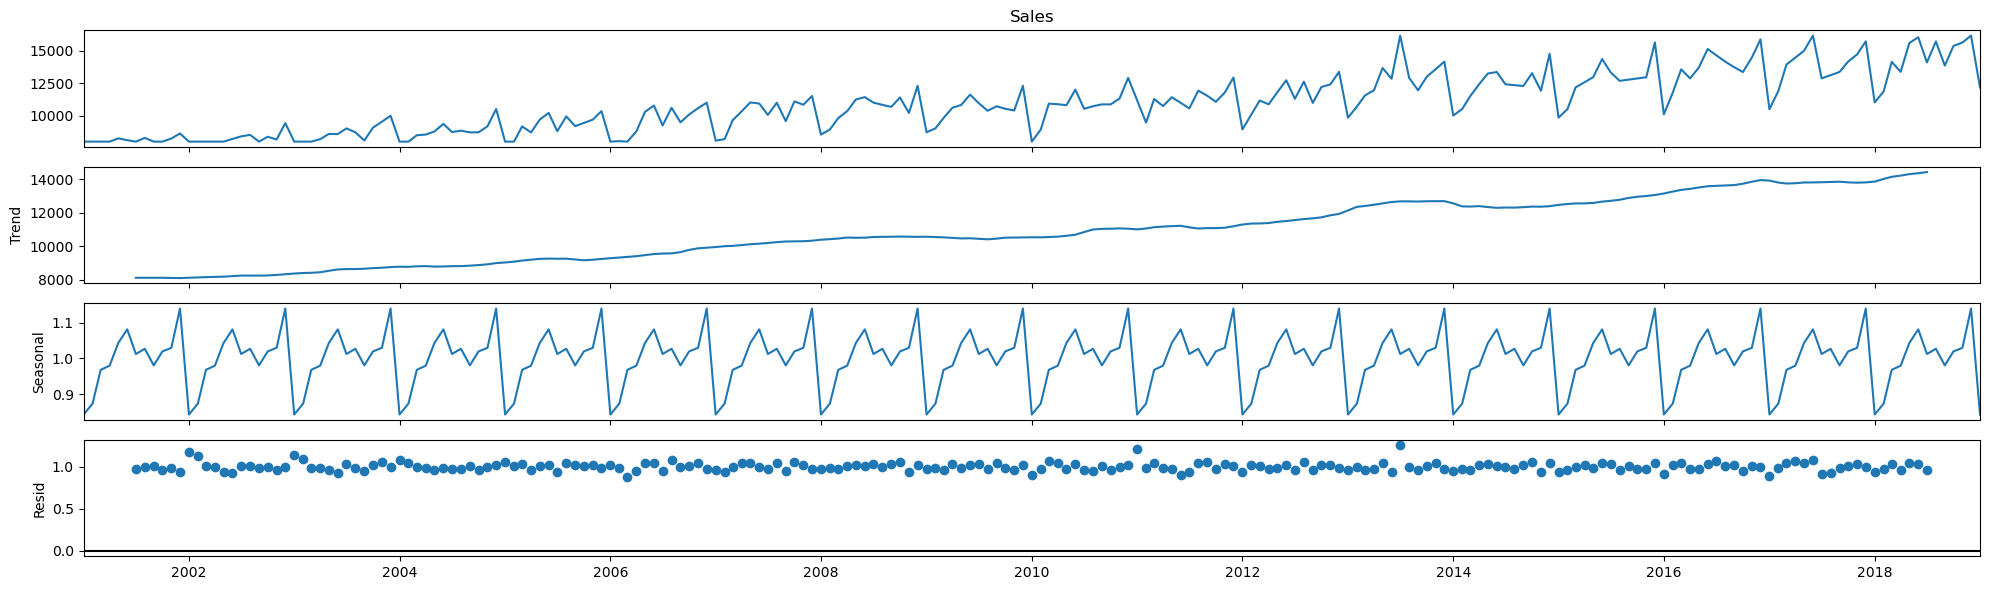

In [16]:
model1.plot()

# Decomposition from Scratch

<Axes: xlabel='DATE'>

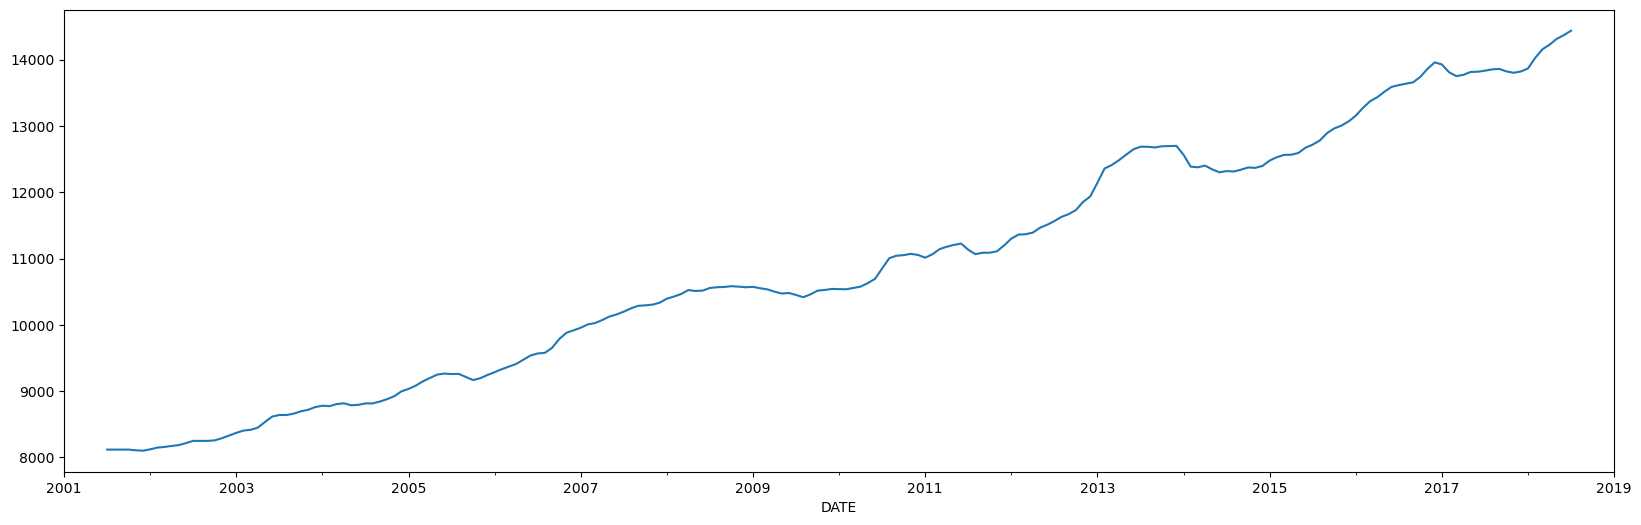

In [17]:
model.trend.plot()

<Axes: xlabel='DATE'>

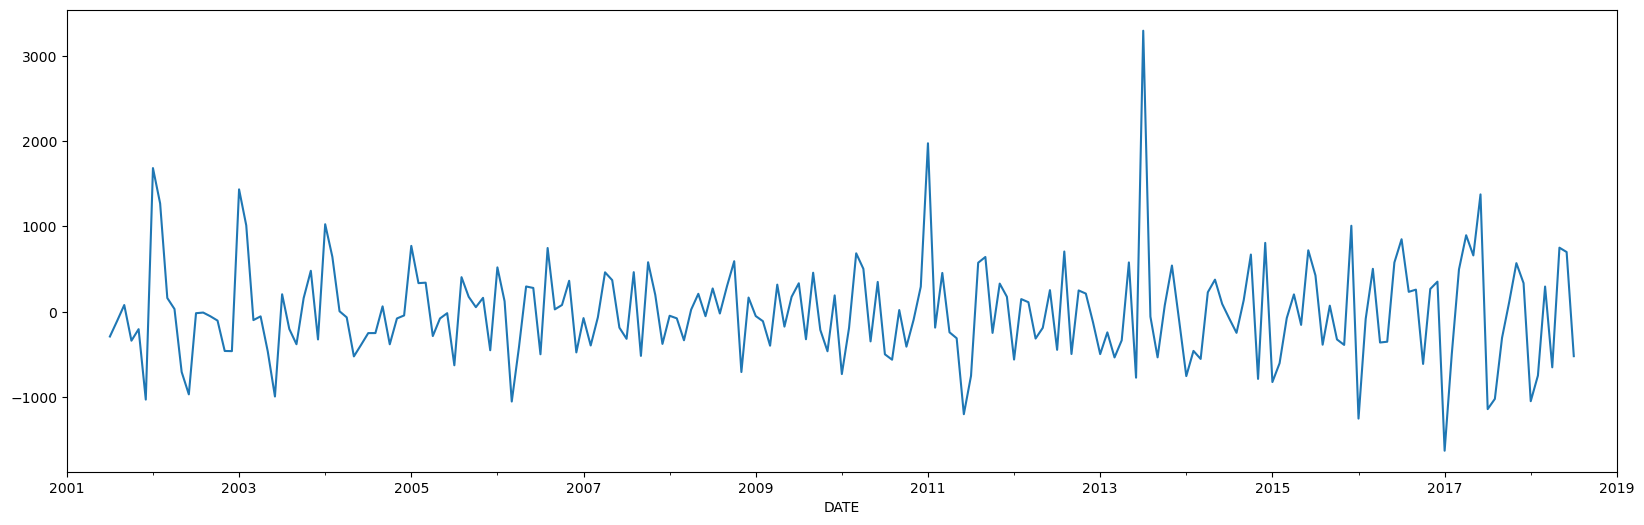

In [18]:
model.resid.plot()

# 1. For Trend we are going to take rolling average 

<Axes: xlabel='DATE'>

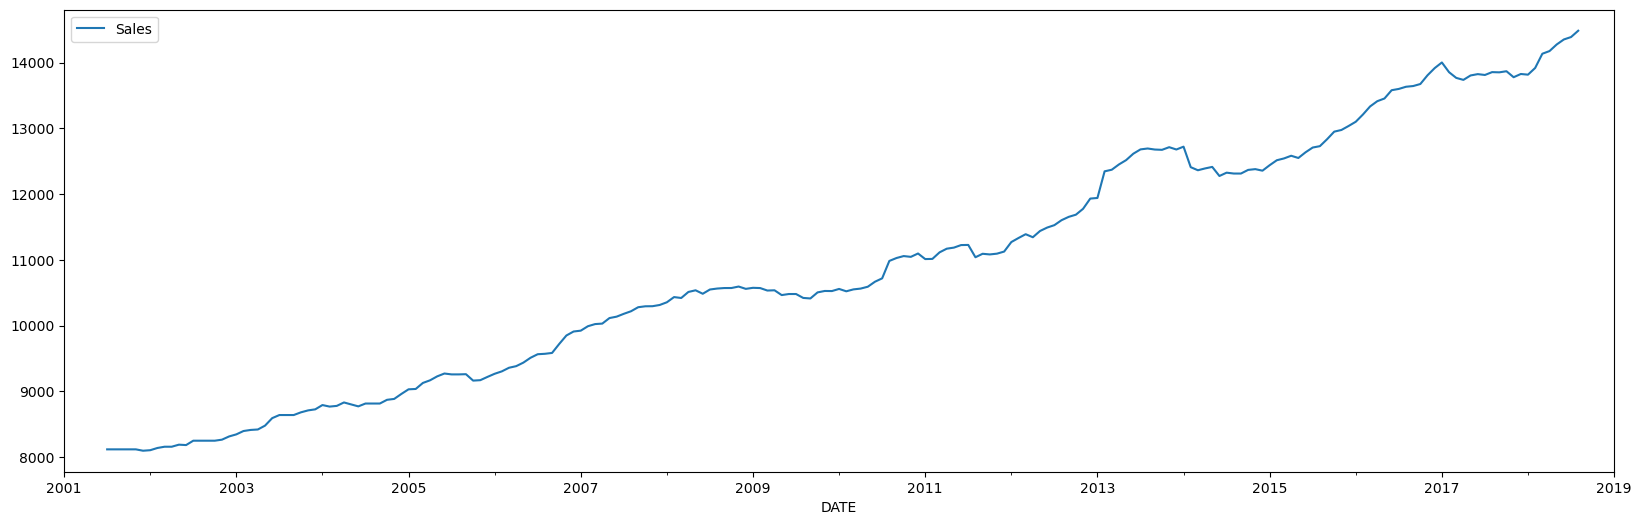

In [19]:
trend = mobile_sales.rolling(12,center=True).mean()
trend.plot() 

In [20]:
# 2. Detrended Series

In [21]:
de_trend = mobile_sales - trend

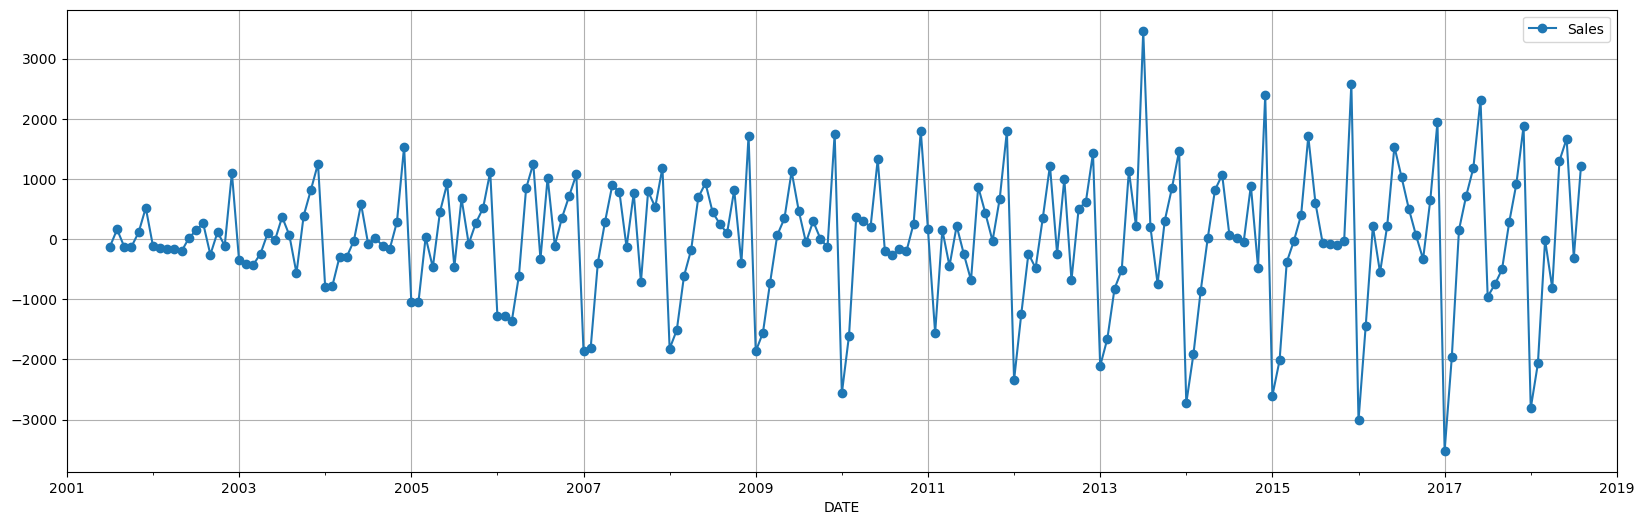

In [22]:
de_trend.plot(style='-o')
plt.grid()

In [23]:
dtf = de_trend.reset_index()
dtf.head(12)

DATE   Sales
0  2001-01-01     NaN
1  2001-02-01     NaN
2  2001-03-01     NaN
3  2001-04-01     NaN
4  2001-05-01     NaN
5  2001-06-01     NaN
6  2001-07-01 -126.25
7  2001-08-01  161.75
8  2001-09-01 -126.25
9  2001-10-01 -126.25
10 2001-11-01  111.75
11 2001-12-01  521.50

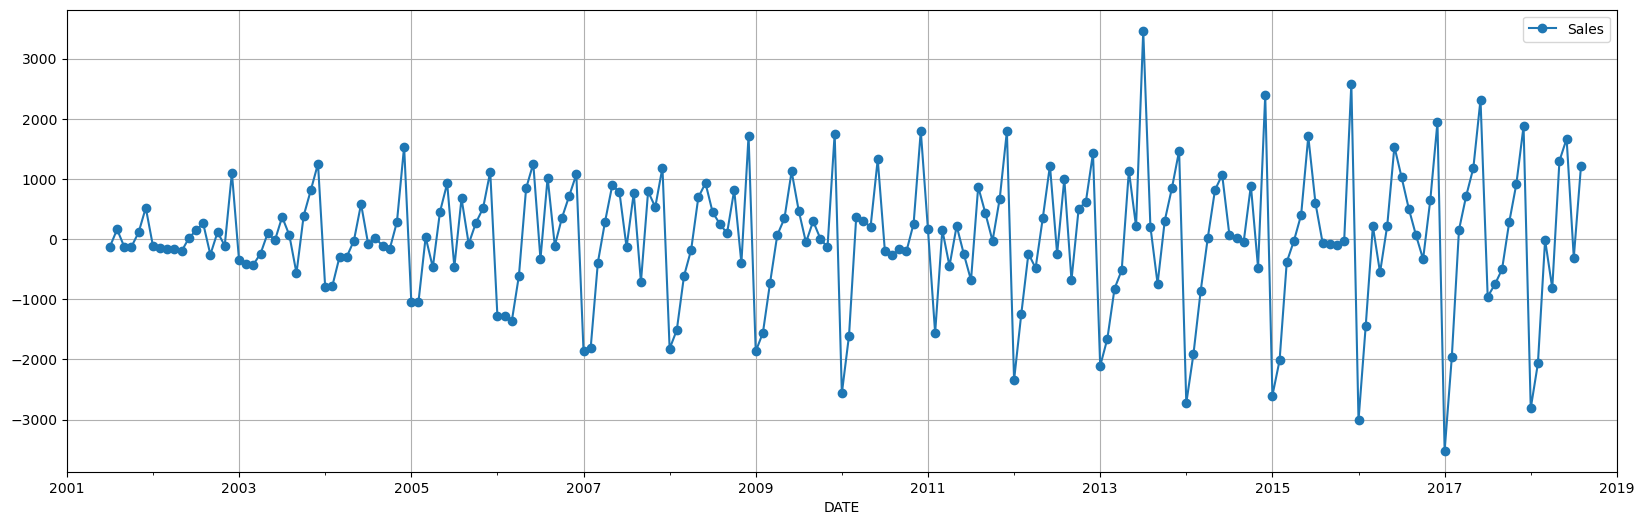

In [24]:
de_trend.plot(style='-o')
plt.grid()

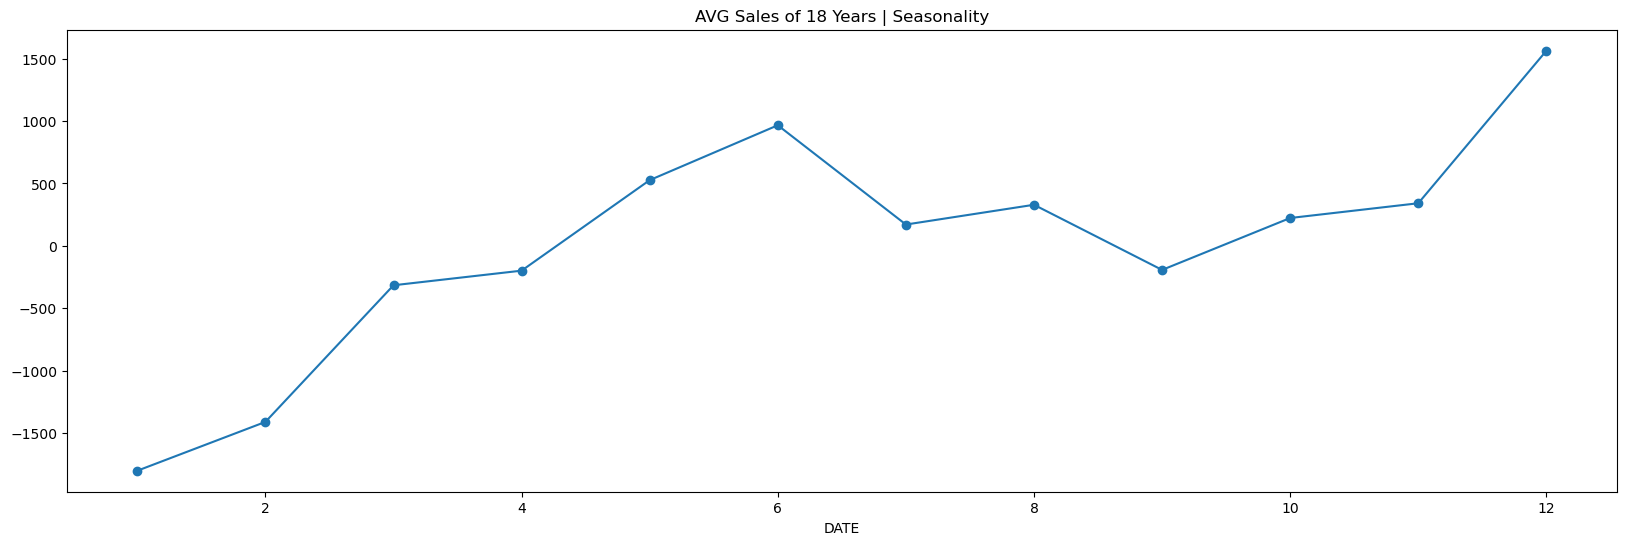

In [25]:
dtf.groupby(dtf['DATE'].dt.month)['Sales'].mean().plot(style='-o')
plt.title('AVG Sales of 18 Years | Seasonality')
plt.show()

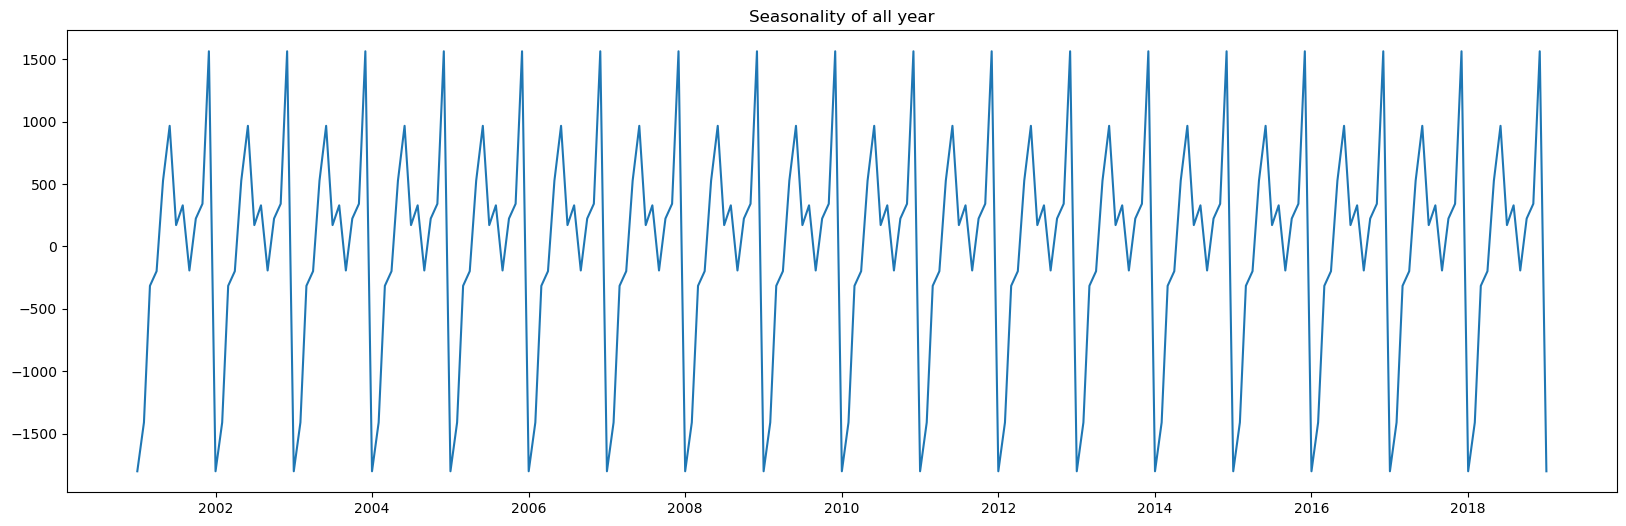

In [26]:
x = dtf['DATE']
y = dtf.groupby(dtf['DATE'].dt.month)['Sales'].transform('mean')
plt.title('Seasonality of all year')
plt.plot(x,y)
plt.show()

[]

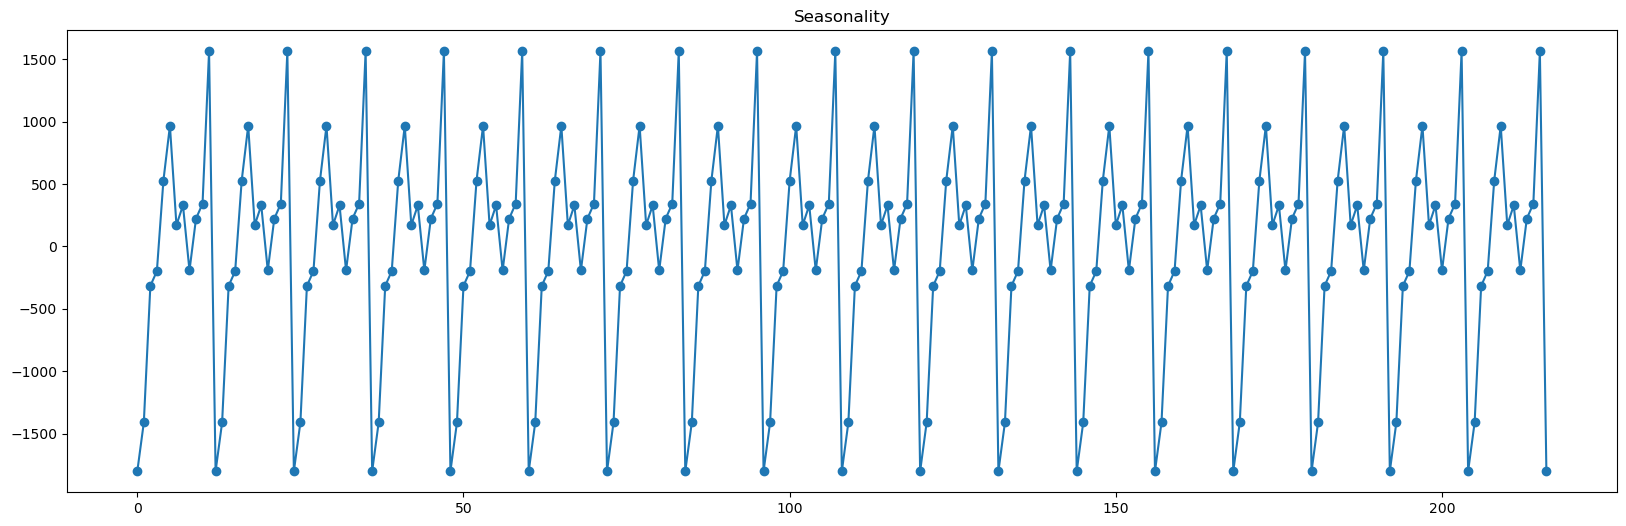

In [27]:
dtf['season'] = dtf.groupby(dtf['DATE'].dt.month)['Sales'].transform('mean')
dtf['season'].plot(style='-o')
plt.title('Seasonality')
plt.plot()

In [28]:
dtf.head(100)

DATE        Sales       season
0  2001-01-01          NaN -1802.416471
1  2001-02-01          NaN -1411.264510
2  2001-03-01          NaN  -316.333137
3  2001-04-01          NaN  -199.230196
4  2001-05-01          NaN   526.191373
..        ...          ...          ...
95 2008-12-01  1721.541667  1563.186471
96 2009-01-01 -1866.375000 -1802.416471
97 2009-02-01 -1555.625000 -1411.264510
98 2009-03-01  -723.458333  -316.333137
99 2009-04-01    67.375000  -199.230196

[100 rows x 3 columns]

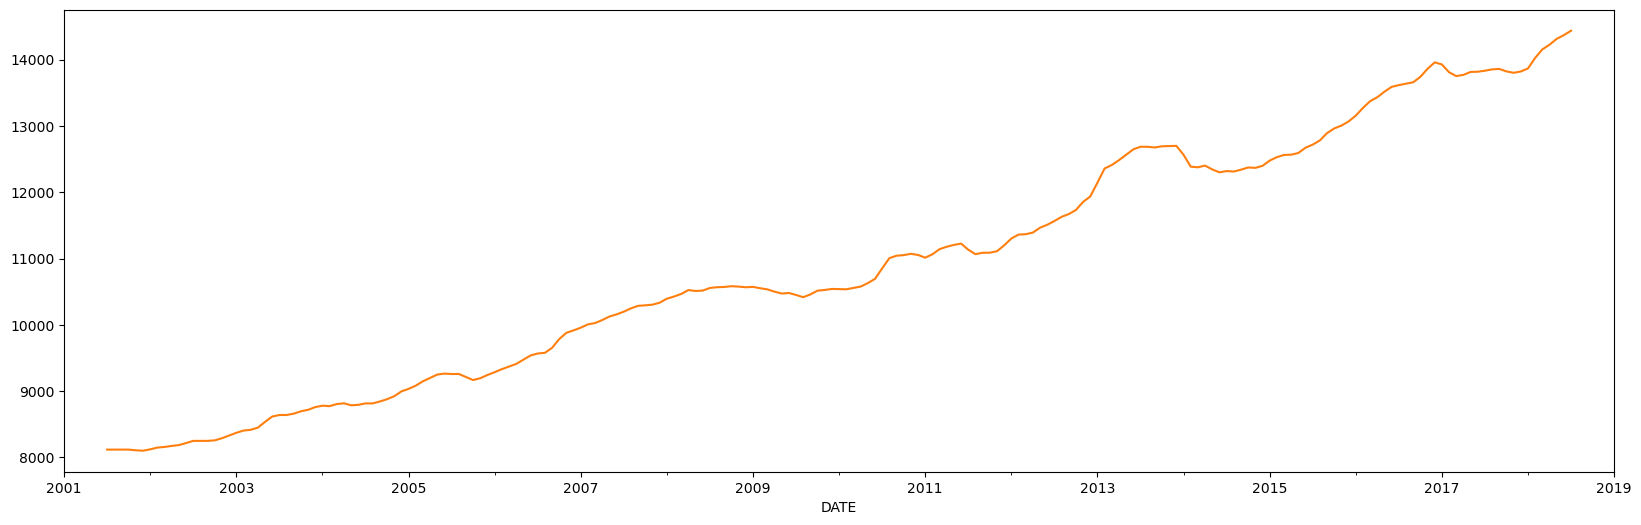

In [29]:
de_seasonality = (mobile_sales.values[:,0] - dtf['season']).rolling(12,center=True).mean()
trend_2 = pd.Series(de_seasonality,index=model.trend.index)
trend_2.plot() # trend from sc ratch
model.trend.plot() # Trend from api
plt.show()

In [30]:
train_max_date = mobile_sales.index[-12]
print(train_max_date)

2018-02-01 00:00:00


In [31]:
train_x = mobile_sales.loc[mobile_sales.index < train_max_date].copy()
test_x = mobile_sales.loc[mobile_sales.index >= train_max_date].copy()

In [32]:
test_x

Sales
DATE                
2018-02-01  11852.00
2018-03-01  14123.00
2018-04-01  13360.00
2018-05-01  15576.00
2018-06-01  16021.00
2018-07-01  14080.00
2018-08-01  15697.00
2018-09-01  13838.00
2018-10-01  15351.00
2018-11-01  15615.00
2018-12-01  16144.48
2019-01-01  12160.00

In [33]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae , mean_absolute_percentage_error as mape

In [34]:
def performance(actual,predicted):
    print('MAE  :', round(mae(actual,predicted),3))
    print('RMSE :', round(mse(actual,predicted)**0.5,3))
    print('MAPE :', f'{round(mape(actual,predicted),3)} %')

# Mean Forcast

In [35]:
# Mean forecast -> Mean of all train data.
train_x['Sales'].mean()

10733.458341463414

In [36]:
test_x['pred'] = train_x['Sales'].mean()

MAE  : 3751.332
RMSE : 4010.265
MAPE : 0.251 %


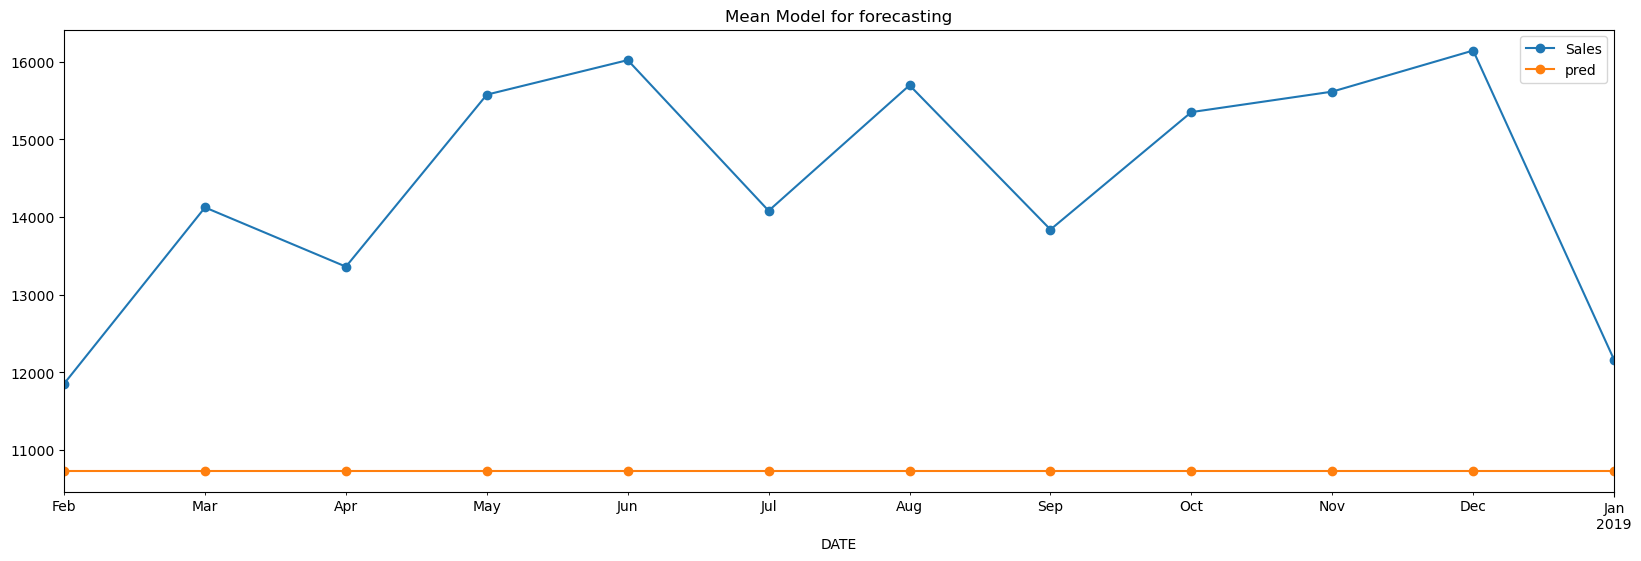

In [37]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('Mean Model for forecasting')
plt.show()

In [38]:
test_x['pred'] = train_x['Sales'][-1]

In [39]:
test_x.head()

Sales     pred
DATE                        
2018-02-01  11852.0  11005.0
2018-03-01  14123.0  11005.0
2018-04-01  13360.0  11005.0
2018-05-01  15576.0  11005.0
2018-06-01  16021.0  11005.0

MAE  : 3479.79
RMSE : 3757.483
MAPE : 0.232 %


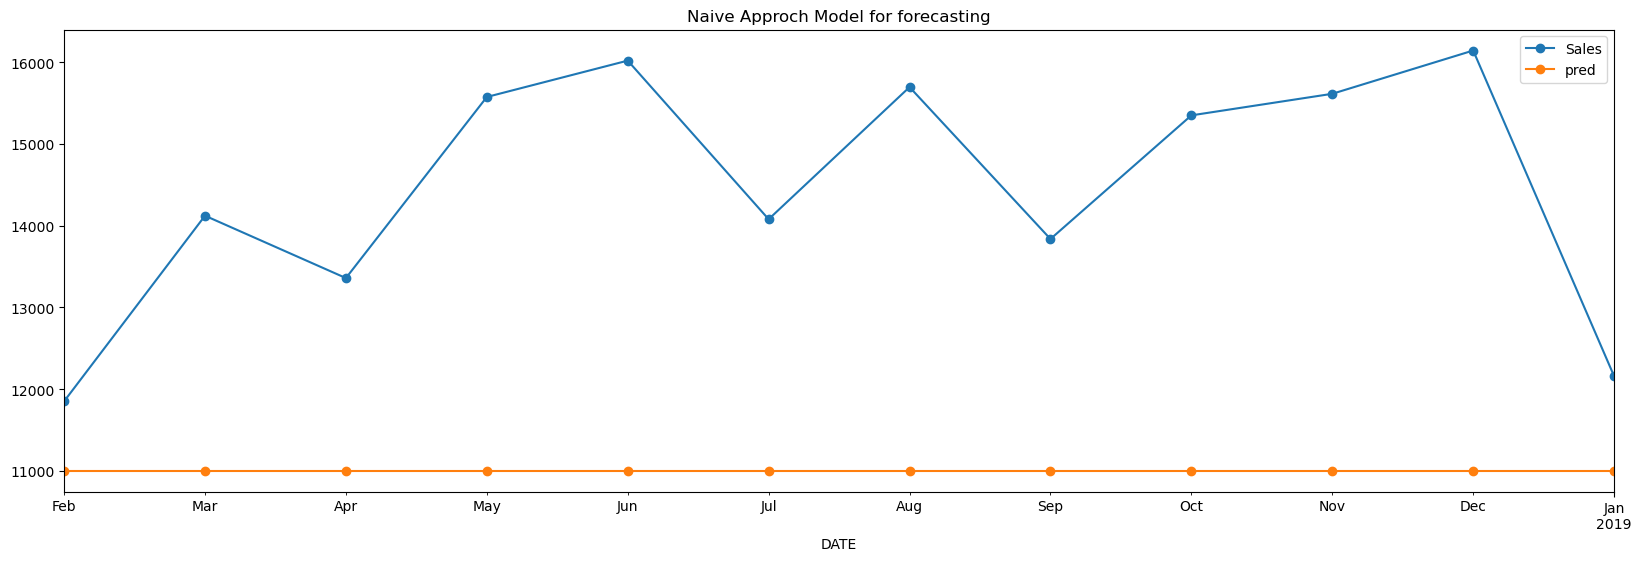

In [40]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('Naive Approch Model for forecasting')
plt.show()

# Seasonal Forecast

In [41]:
test_x.index[0] - pd.DateOffset(years=1)

Timestamp('2017-02-01 00:00:00')

In [42]:
for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i-pd.DateOffset(years=1)]['Sales']

In [43]:
test_x

Sales      pred
DATE                          
2018-02-01  11852.00  11891.00
2018-03-01  14123.00  13921.00
2018-04-01  13360.00  14453.50
2018-05-01  15576.00  14986.00
2018-06-01  16021.00  16144.48
2018-07-01  14080.00  12856.00
2018-08-01  15697.00  13102.50
2018-09-01  13838.00  13349.00
2018-10-01  15351.00  14150.00
2018-11-01  15615.00  14698.00
2018-12-01  16144.48  15704.00
2019-01-01  12160.00  11005.00

MAE  : 839.08
RMSE : 1075.542
MAPE : 0.058 %


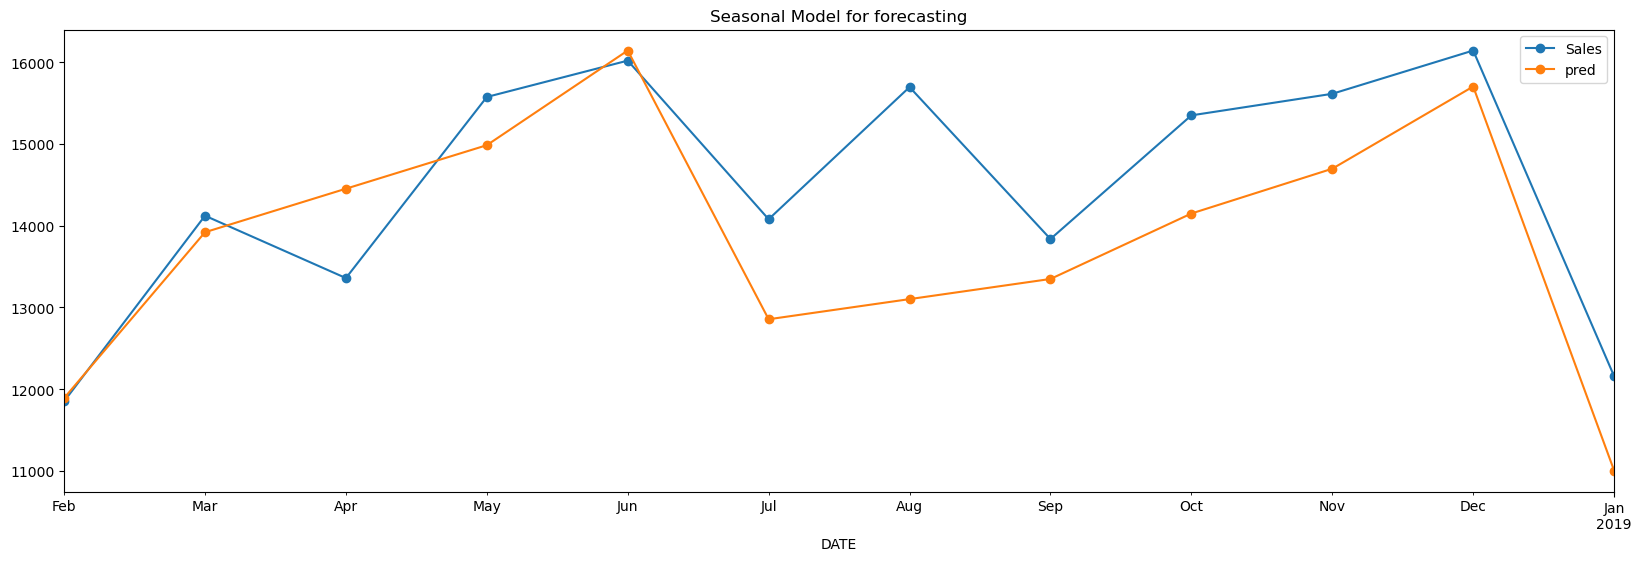

In [44]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('Seasonal Model for forecasting')
plt.show()

# Drift Method

In [45]:
y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

slope = (y_t - y_0)/len(train_x['Sales'])

h = np.linspace(0,len(test_x)-1,len(test_x))

h

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [46]:
test_x['pred'] = y_t+h*slope

MAE  : 3398.927
RMSE : 3677.86
MAPE : 0.227 %


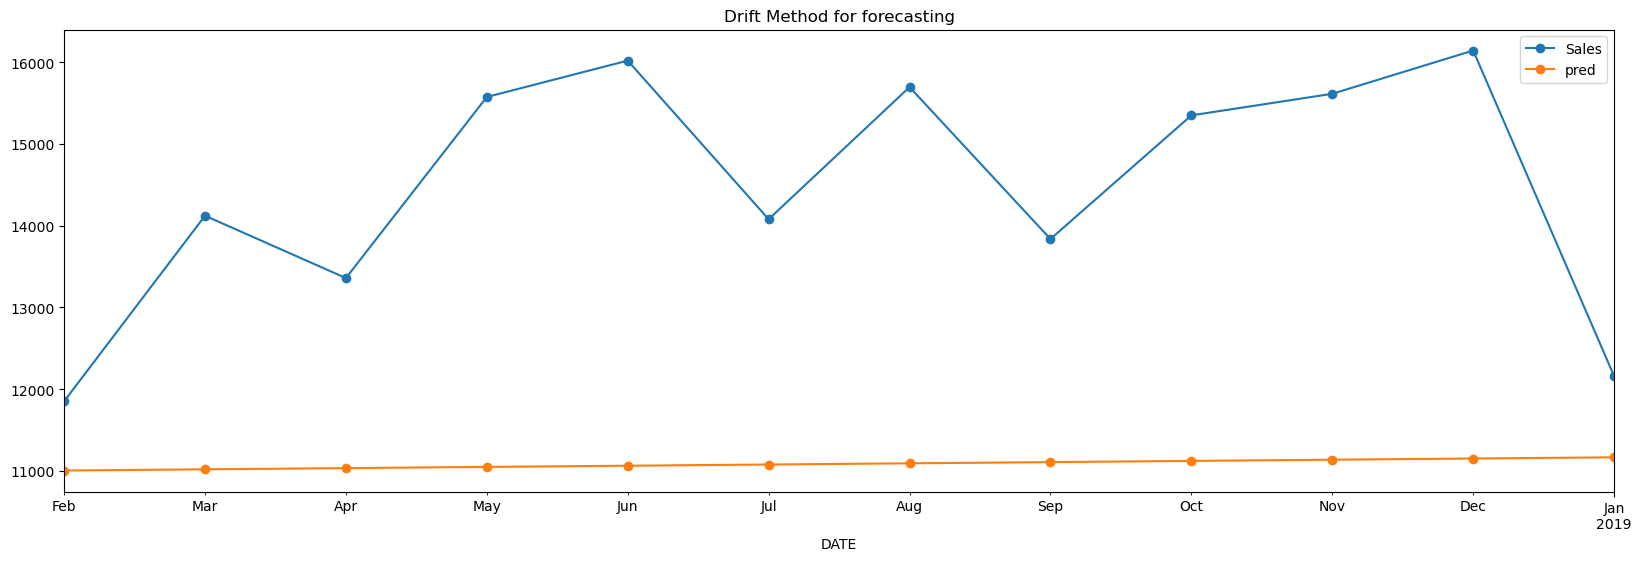

In [47]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('Drift Method for forecasting')
plt.show()

In [48]:
pred_ = train_x.Sales.dropna().copy().values
for i in range(12):
    pred_ = np.append(pred_,pred_[-3:].mean())

In [49]:
test_x['pred'] = pred_[-12:]

MAE  : 1738.024
RMSE : 1940.885
MAPE : 0.117 %


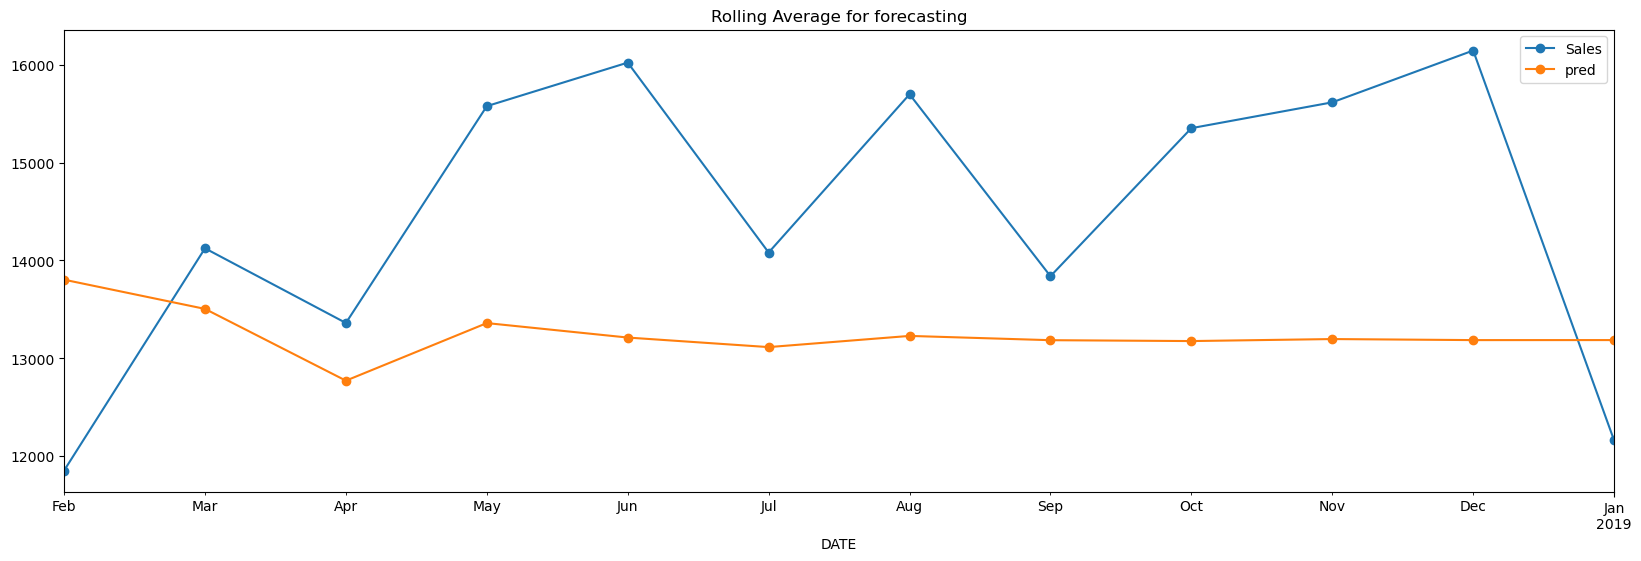

In [50]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('Rolling Average for forecasting')
plt.show()

# SES

In [51]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales['Sales'])
model.fit(smoothing_level=0.05).fittedvalues

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     7991.000000
2001-02-01     7991.000000
2001-03-01     7991.000000
2001-04-01     7991.000000
2001-05-01     7991.000000
                  ...     
2018-09-01    13708.946806
2018-10-01    13715.399466
2018-11-01    13797.179493
2018-12-01    13888.070518
2019-01-01    14000.890992
Length: 217, dtype: float64

C:\Users\gaura\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='DATE'>

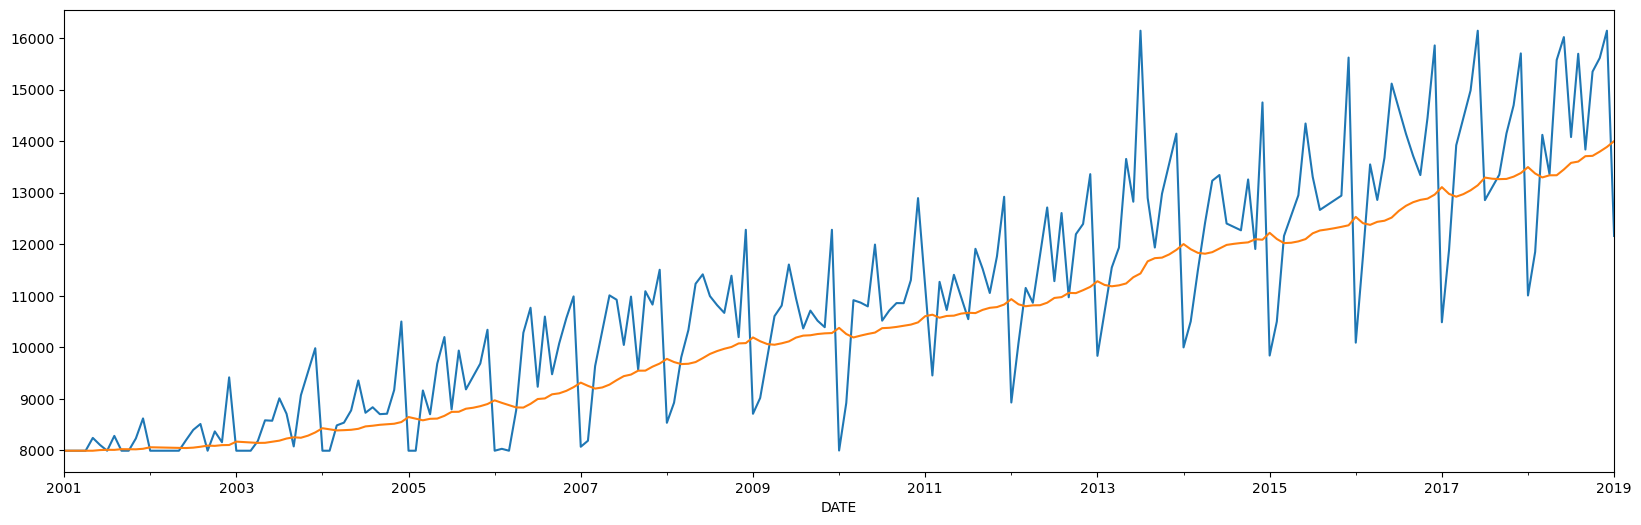

In [52]:
mobile_sales['Sales'].plot()
model.fit(smoothing_level=0.05).fittedvalues.plot()

In [53]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales['Sales']).fit(smoothing_level=0.05)
pred = model.forecast(12)

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


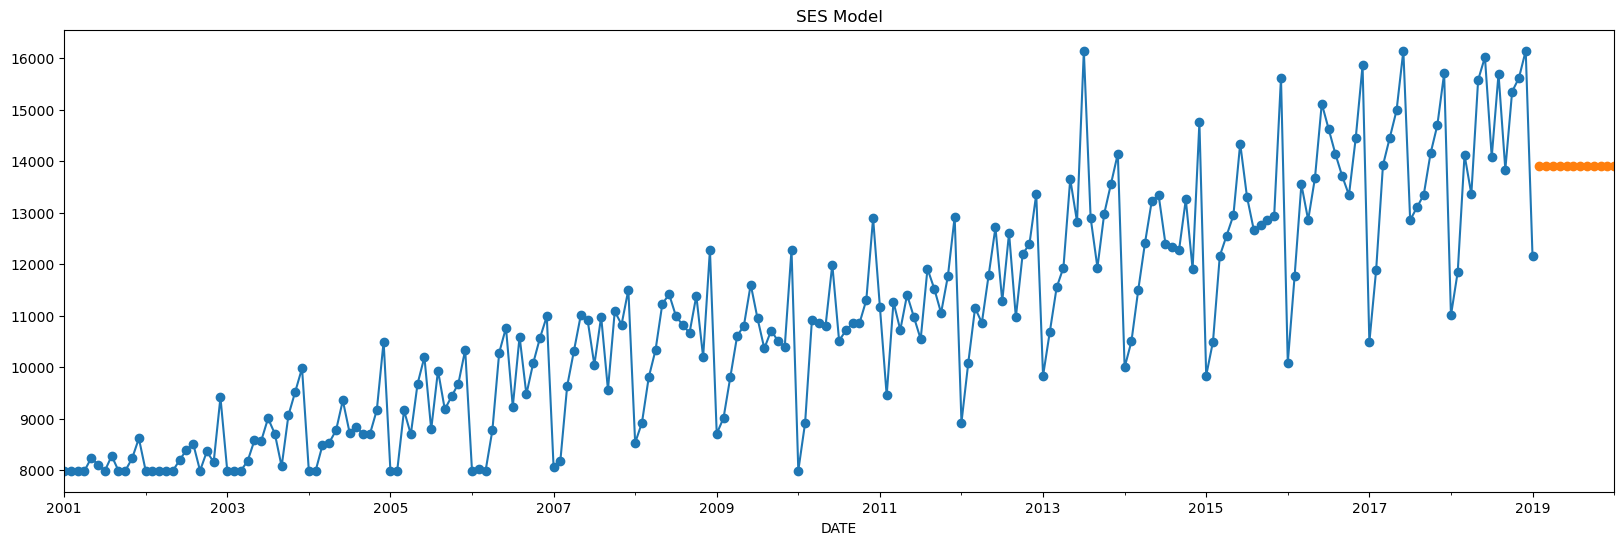

In [54]:
mobile_sales['Sales'].plot(style='-o')
pred.plot(label='pred',style='-o')
plt.title('SES Model')
plt.show()

# DES

In [55]:
model = sm.tsa.ExponentialSmoothing(mobile_sales['Sales'],trend='add').fit()

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


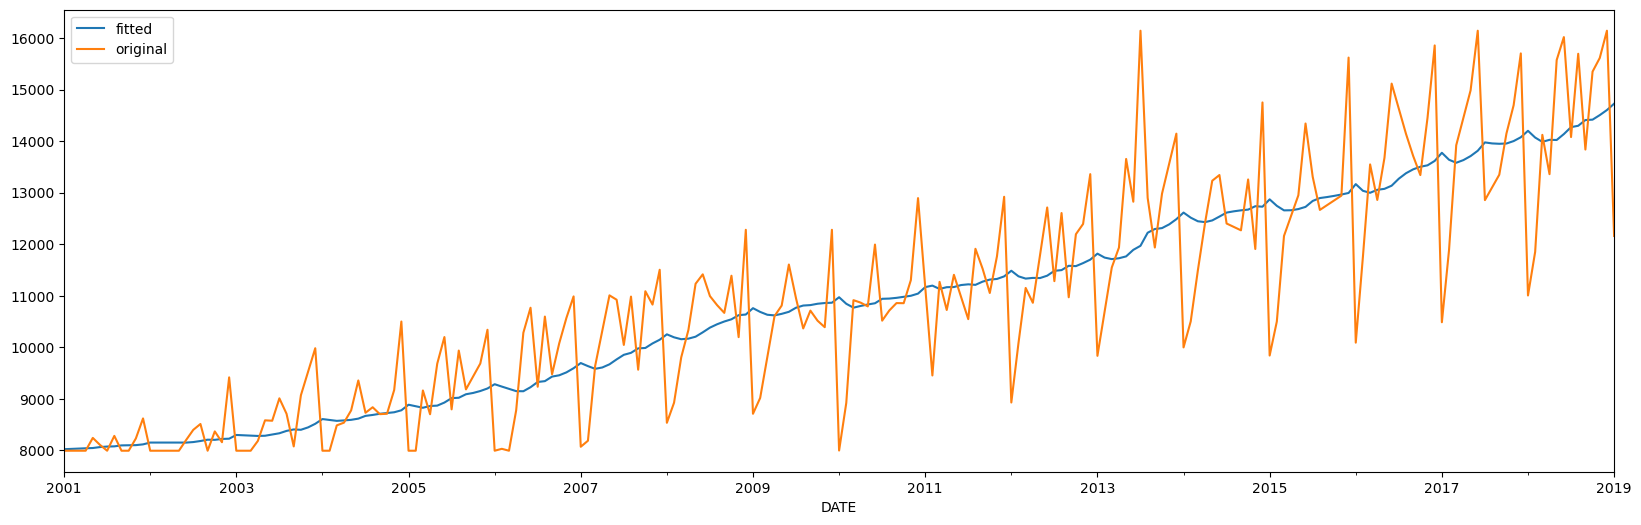

In [56]:
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()
plt.show()

In [57]:
pred = model.forecast(12)

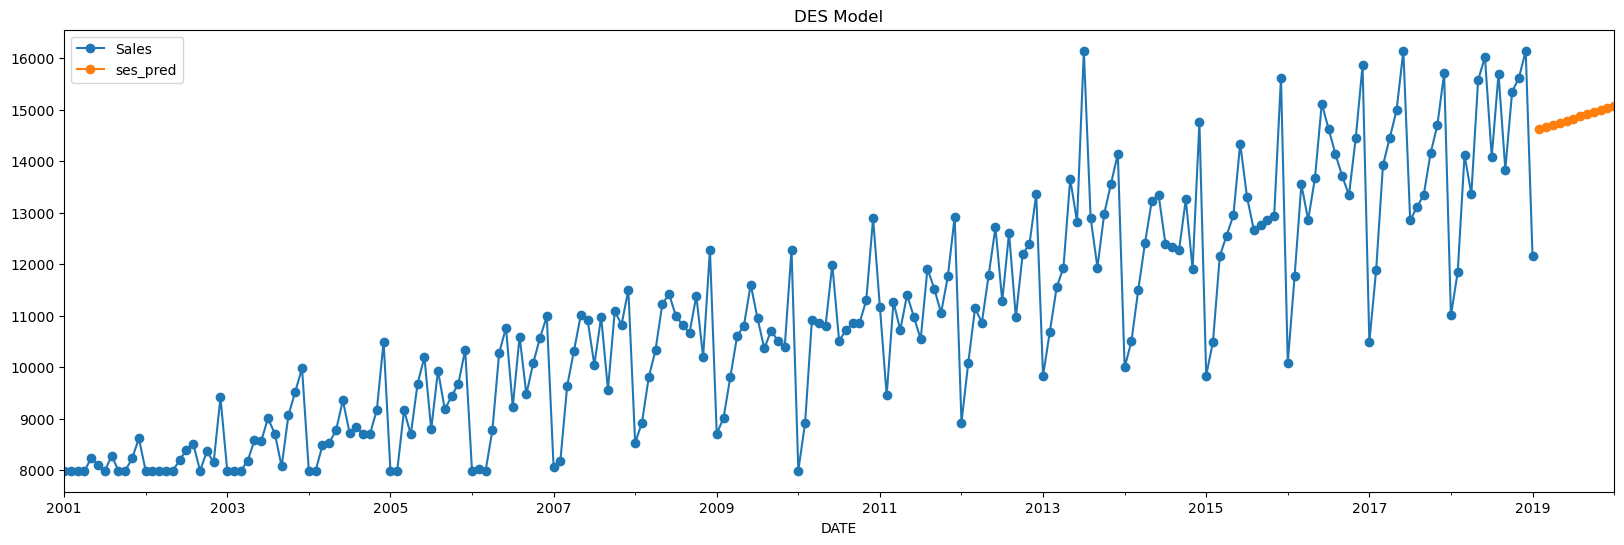

In [58]:
mobile_sales['Sales'].plot(style='-o')
pred.plot(label='ses_pred',style='-o')
plt.title('DES Model')
plt.legend()
plt.show()

In [59]:
pred.values

array([14632.91276772, 14672.03413846, 14711.1555092 , 14750.27687993,
       14789.39825067, 14828.51962141, 14867.64099214, 14906.76236288,
       14945.88373362, 14985.00510435, 15024.12647509, 15063.24784583])

In [60]:
test_x['pred'] = pred.values

In [61]:
test_x

Sales          pred
DATE                              
2018-02-01  11852.00  14632.912768
2018-03-01  14123.00  14672.034138
2018-04-01  13360.00  14711.155509
2018-05-01  15576.00  14750.276880
2018-06-01  16021.00  14789.398251
2018-07-01  14080.00  14828.519621
2018-08-01  15697.00  14867.640992
2018-09-01  13838.00  14906.762363
2018-10-01  15351.00  14945.883734
2018-11-01  15615.00  14985.005104
2018-12-01  16144.48  15024.126475
2019-01-01  12160.00  15063.247846

MAE  : 1203.648
RMSE : 1434.533
MAPE : 0.089 %


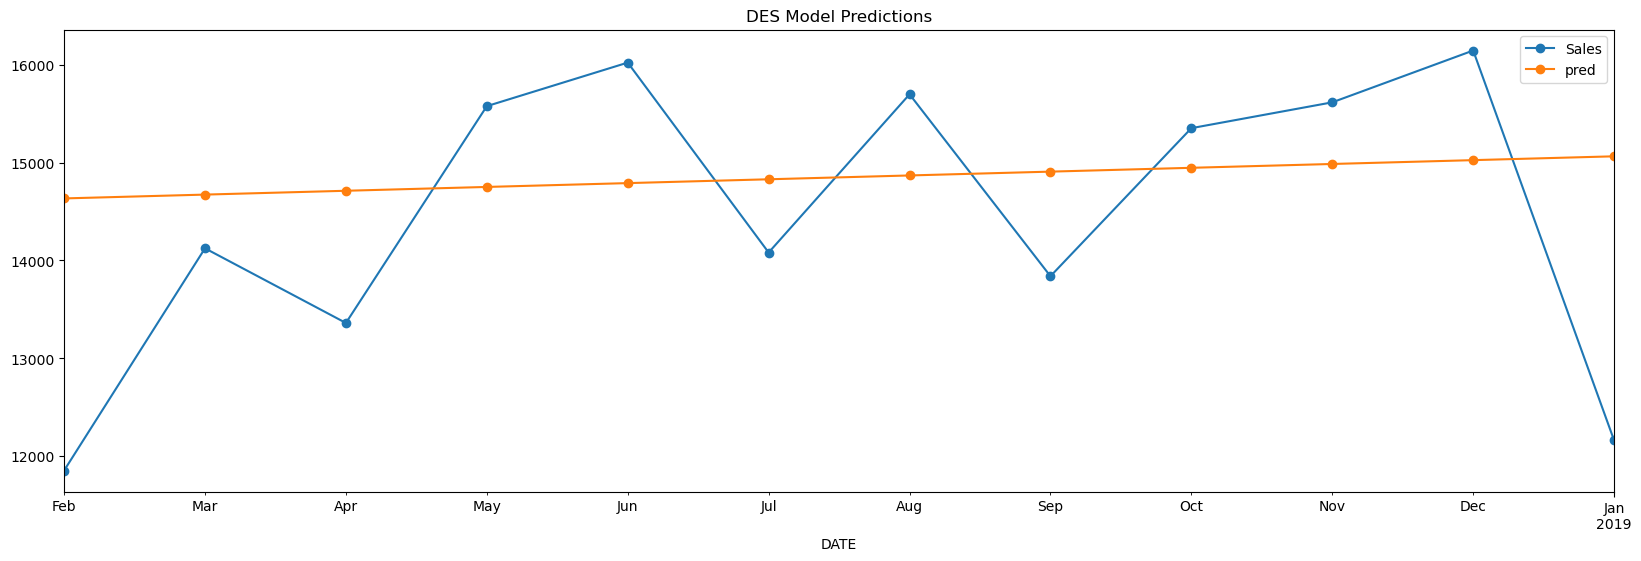

In [62]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('DES Model Predictions')
plt.show()

# TES

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


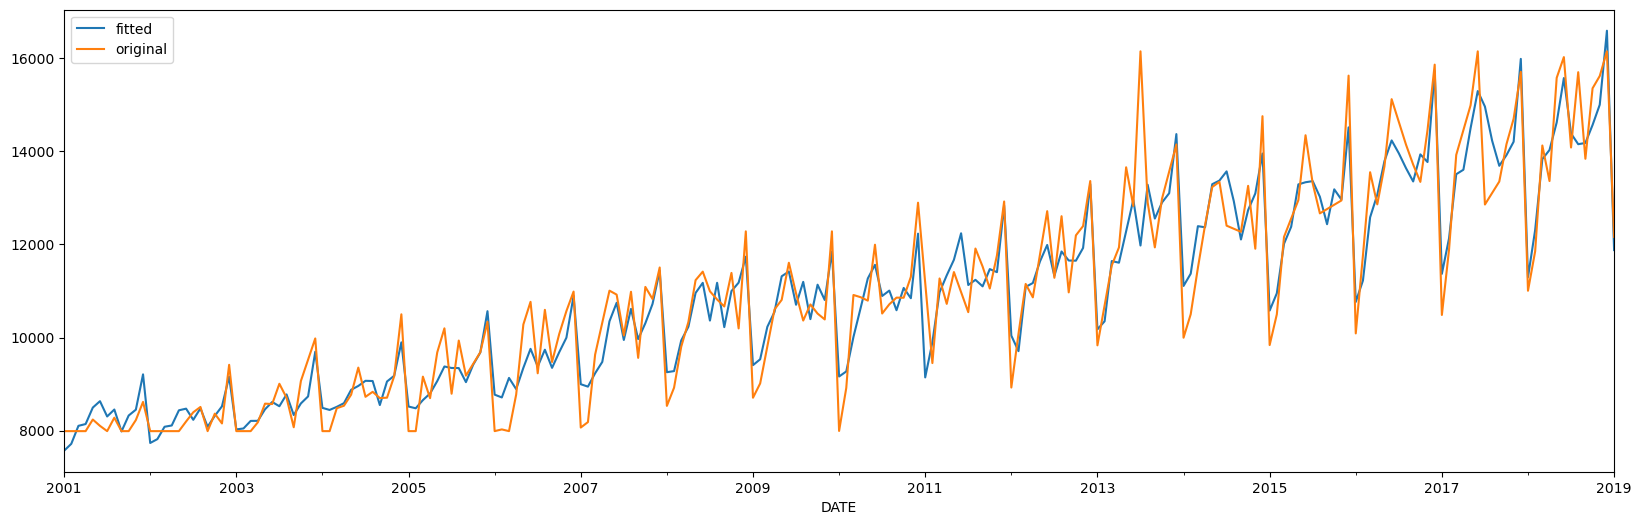

In [63]:
model = sm.tsa.ExponentialSmoothing(mobile_sales['Sales'],trend='add',seasonal='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()
plt.show()

In [64]:
pred = model.forecast(12)

<Axes: xlabel='DATE'>

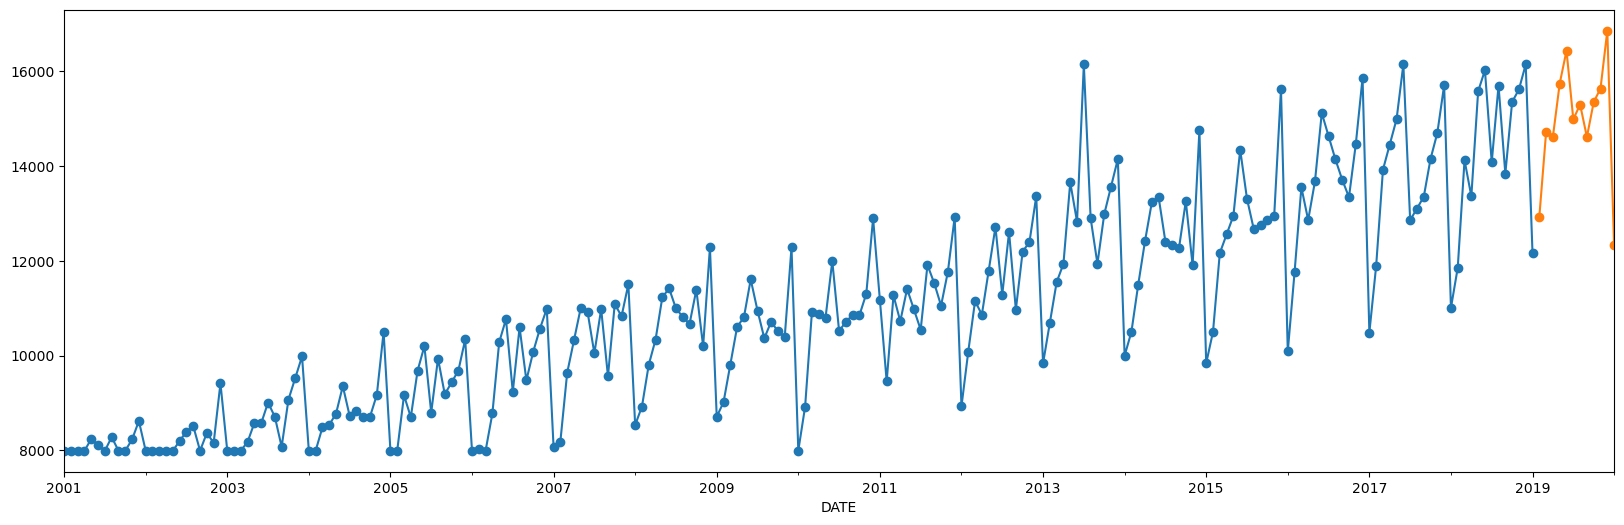

In [65]:
mobile_sales.Sales.plot(label='original',style='-o')
pred.plot(label='des_pred',style='-o')

In [66]:
test_x['pred'] = pred.values

MAE  : 539.713
RMSE : 670.471
MAPE : 0.039 %


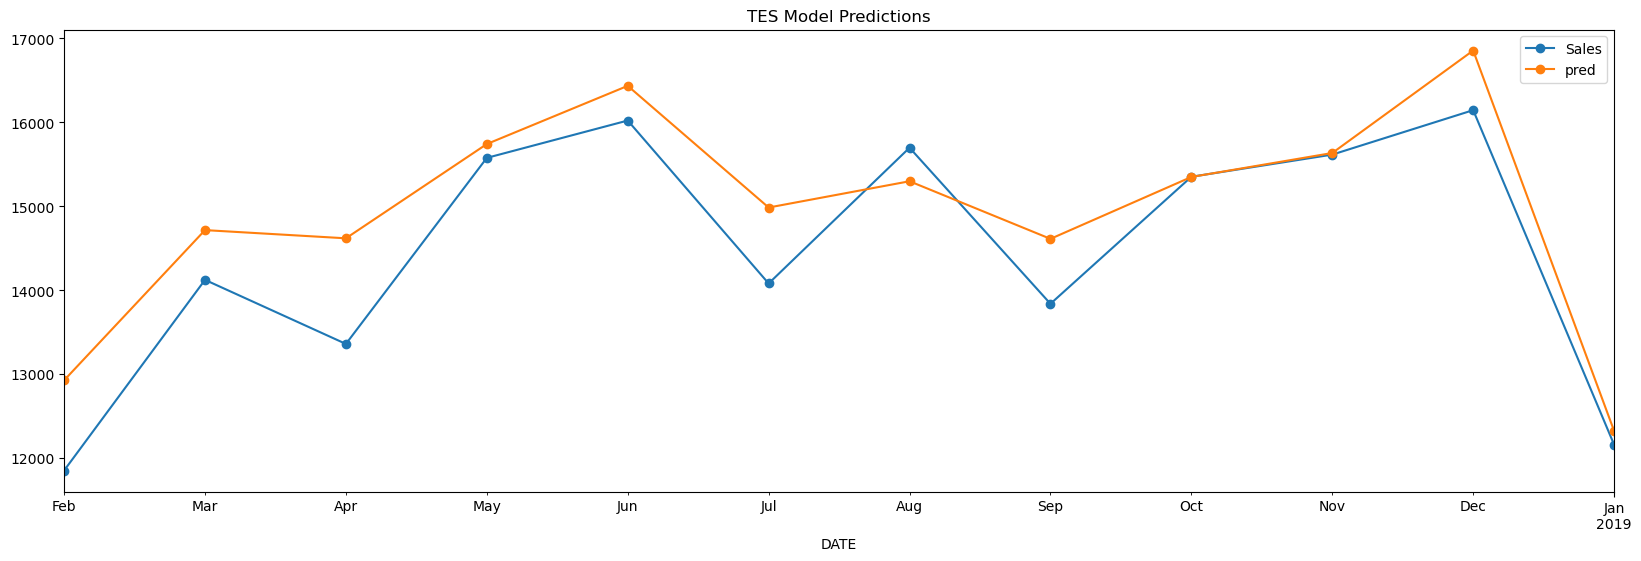

In [67]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('TES Model Predictions')
plt.show()

# ARIMA Family

# Dickey Fuller Test

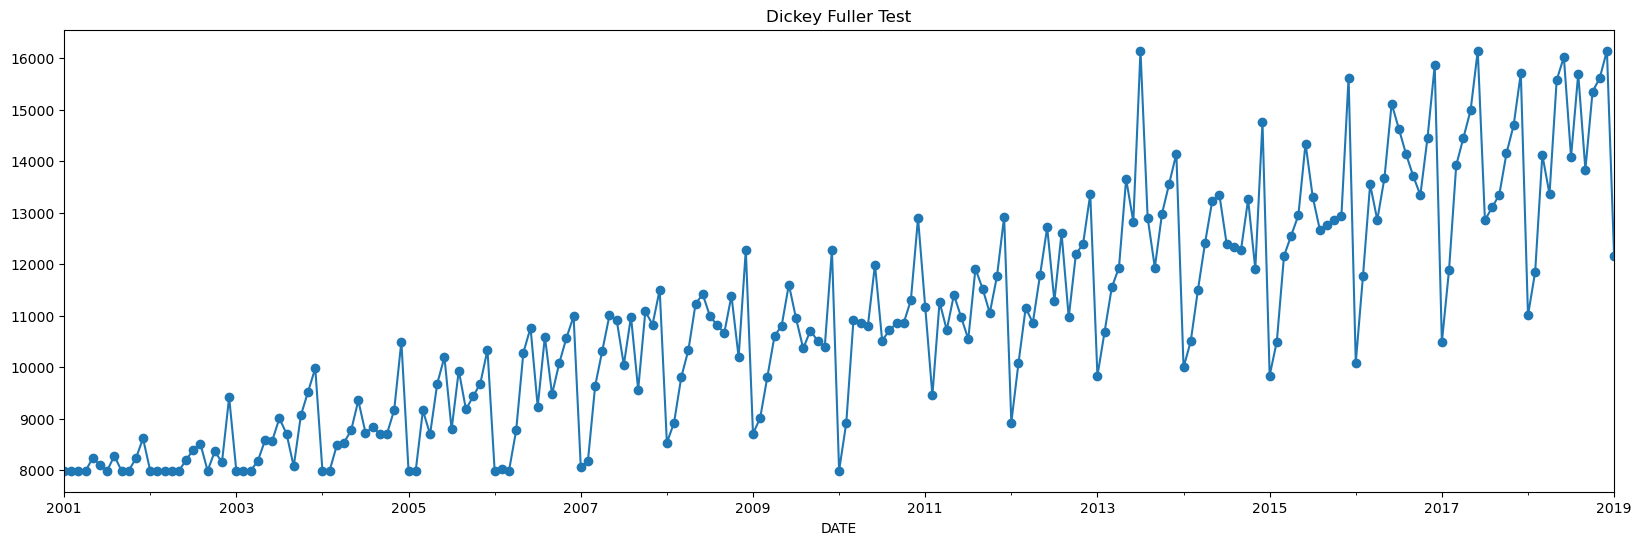

In [68]:
mobile_sales['Sales'].plot(style='-o')
plt.title('Dickey Fuller Test')
plt.show()

In [69]:
# H0 : TS is non stationary 
# H1 : TS is stationary

def adf_test(data,sig_val=0.05):
    p_value = sm.tsa.stattools.adfuller(data)[1]
    #print(f'p-value : {p_value}')
    if(p_value <= sig_val):
        print('TS is stationary',p_value)
    else:
        print('TS is non stationary',p_value)
adf_test(mobile_sales['Sales'])

TS is non stationary 0.9915984051477174


In [70]:
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'],model='additive')

<Axes: xlabel='DATE'>

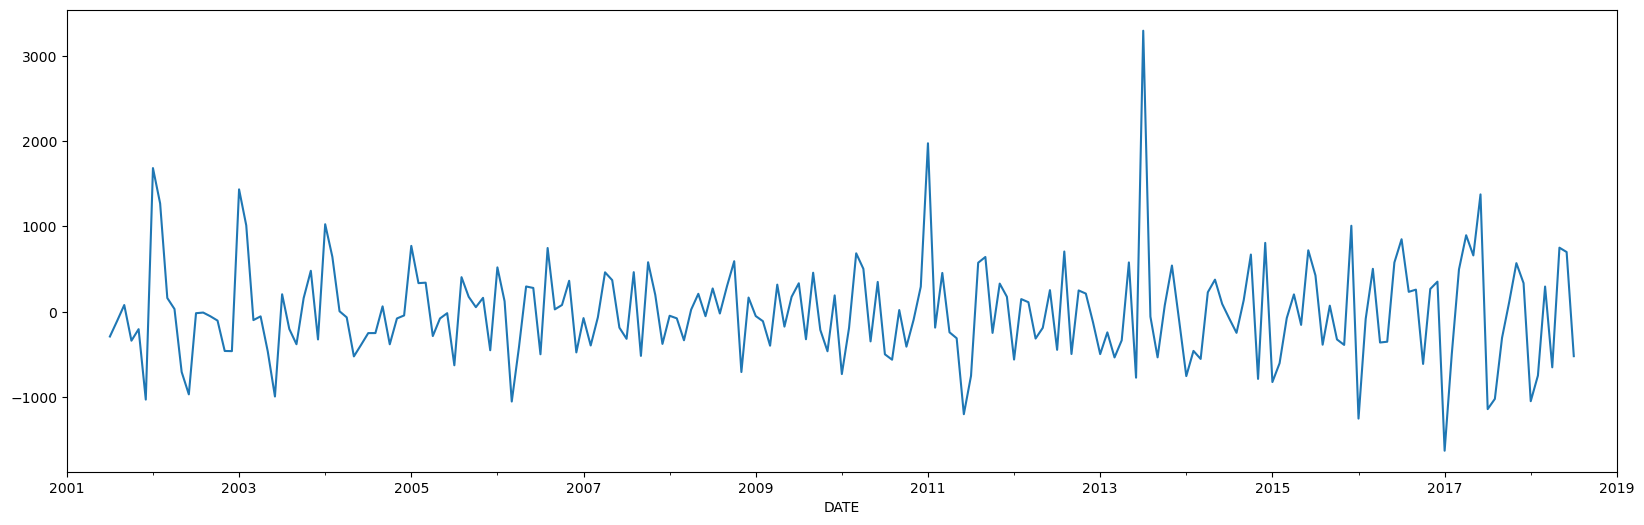

In [71]:
model.resid.plot()

In [72]:
adf_test(model.resid.dropna())

TS is stationary 4.03299413432248e-08


# Auto Correlation

In [73]:
lag = 1
val1 = mobile_sales['Sales'][lag:]
val2 = mobile_sales['Sales'].shift(lag)[lag:]

In [74]:
np.corrcoef(val1,val2)[0,1]

0.7941918126773353

In [75]:
lag = 12
val1 = mobile_sales['Sales'][lag:]
val2 = mobile_sales['Sales'].shift(lag)[lag:]
np.corrcoef(val1,val2)[0,1]

0.9343551172739794

In [76]:
from statsmodels.graphics.tsaplots import plot_acf

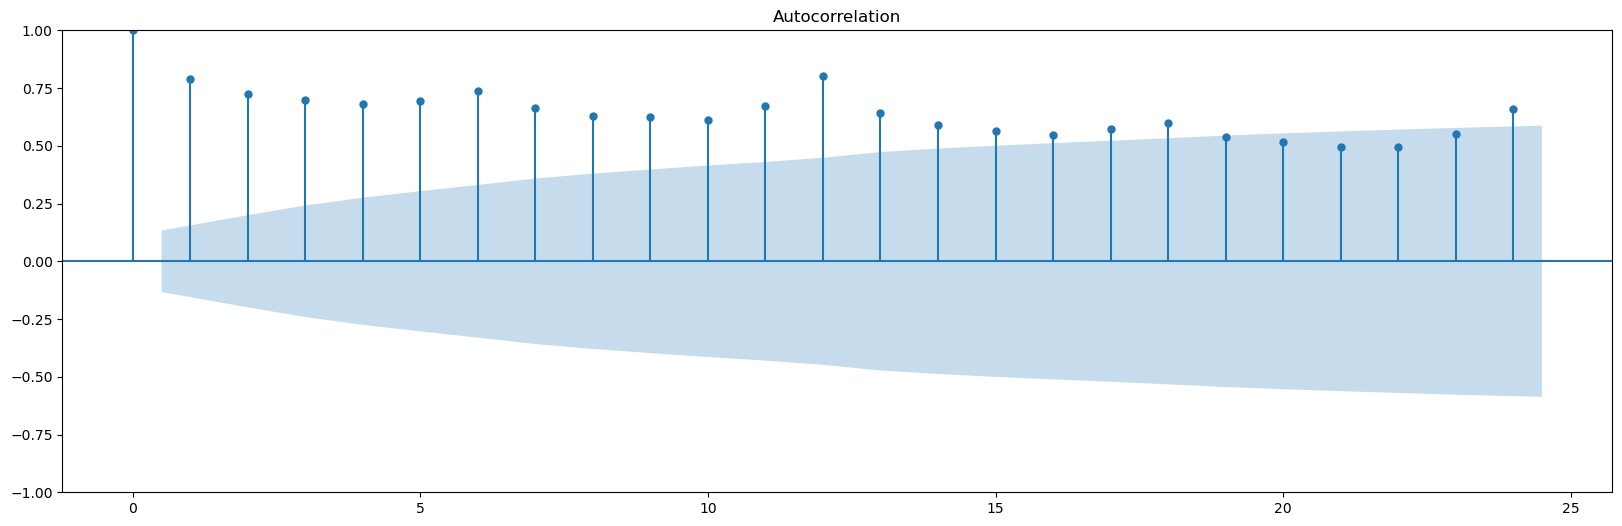

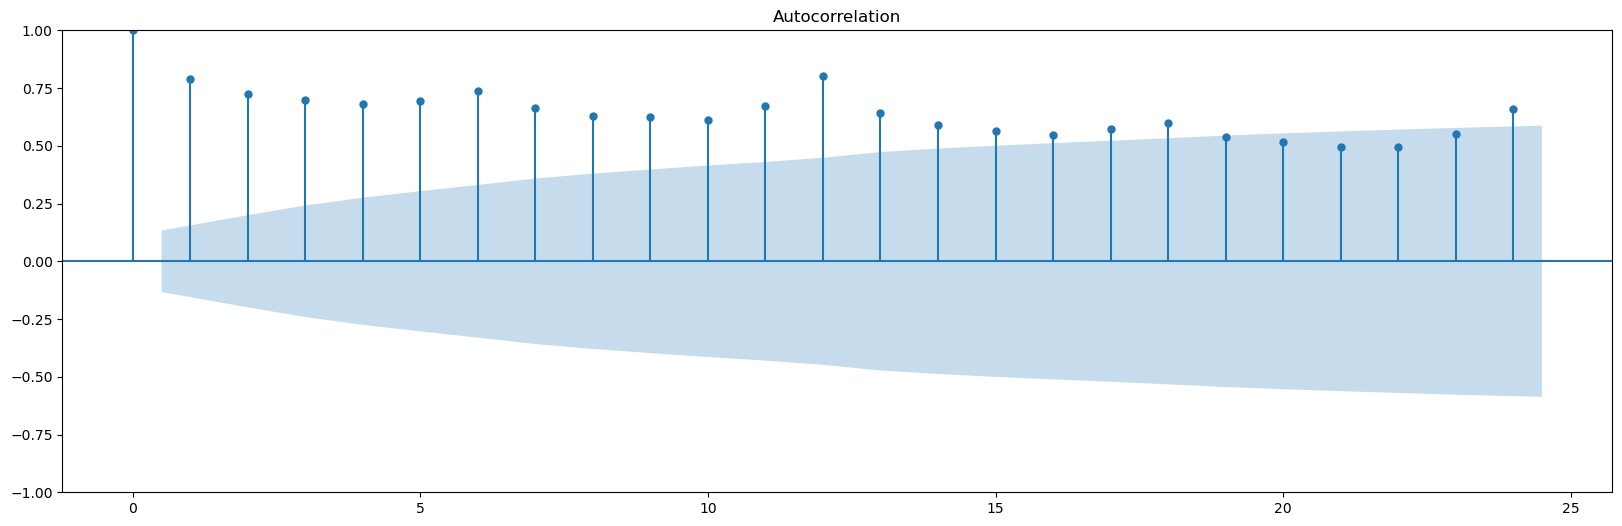

In [77]:
plot_acf(mobile_sales['Sales'])

<Axes: xlabel='DATE'>

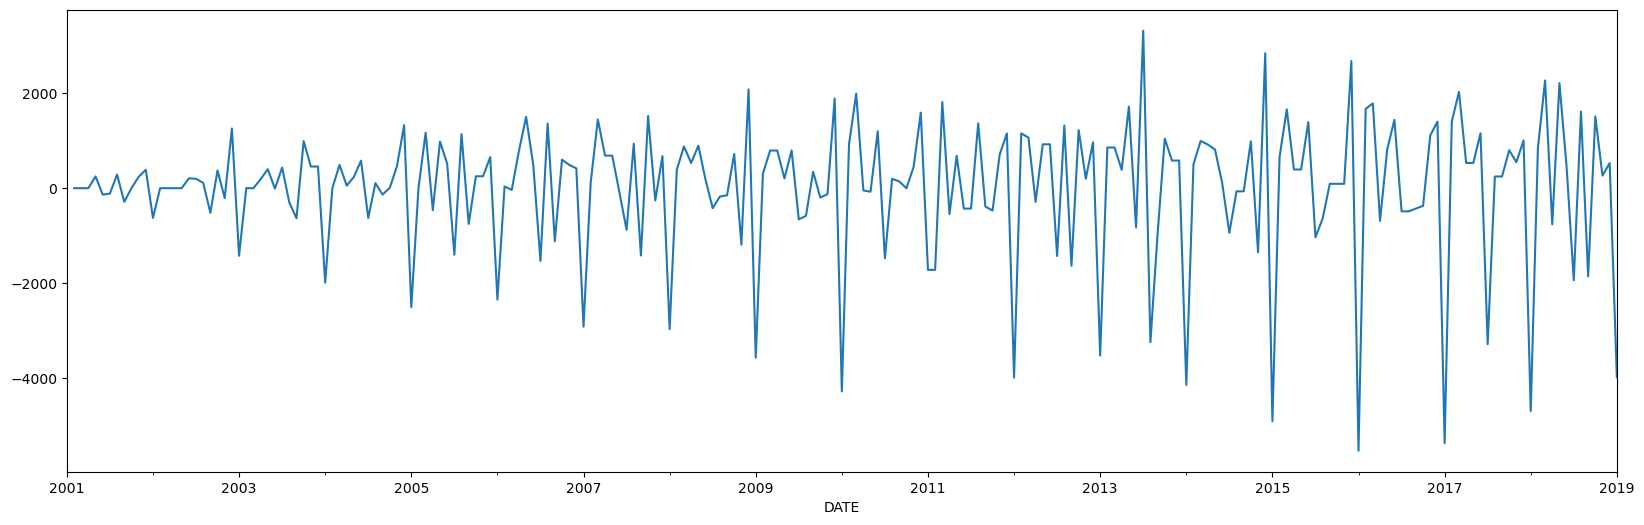

In [78]:
mobile_sales['Sales'].diff(1).plot()

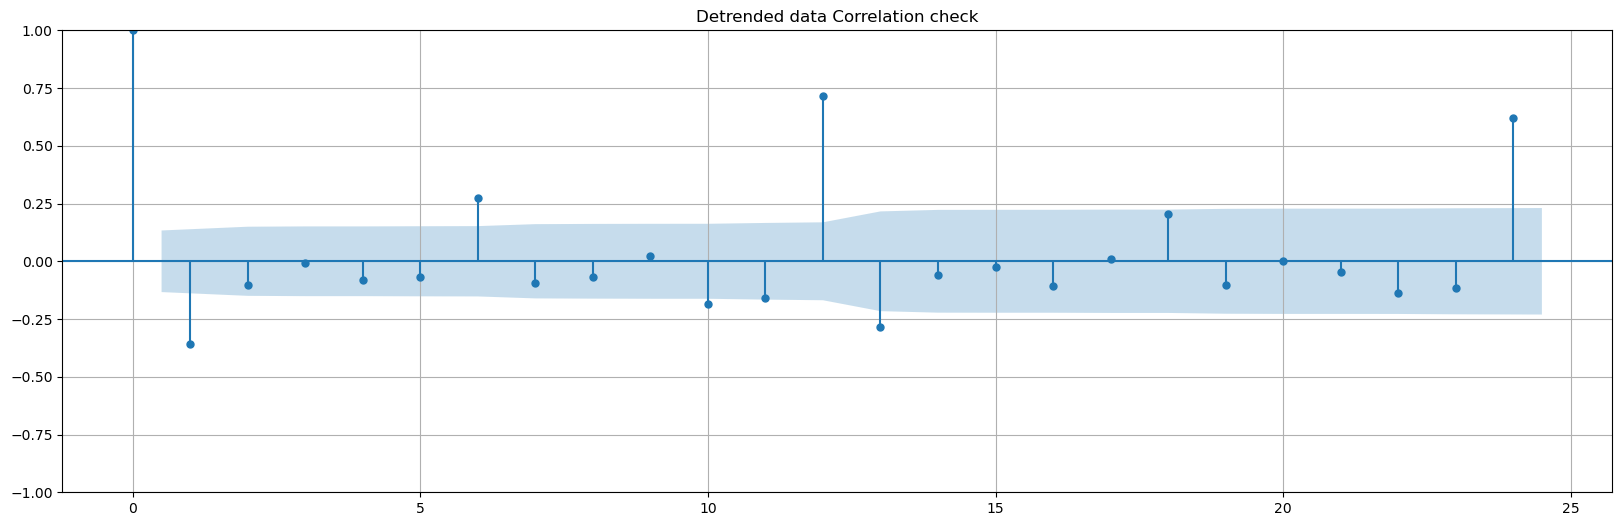

In [79]:
plot_acf(mobile_sales['Sales'].diff(1).dropna())
plt.title('Detrended data Correlation check')
plt.grid()
plt.show()

In [80]:
# Assignments

In [81]:
dates = ['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29', '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28', '2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08']
units_sold = [147, 342, 380, 292, 114, 311, 339, 90, 446, 302, 149, 362, 165, 103, 90, 473, 24, 391, 472, 427, 294, 169, 116, 378, 62, 296, 33, 89, 485, 224, 404, 281, 137, 238, 381, 335, 121, 182, 6, 376, 46, 445, 353, 377, 61, 119, 245, 302, 49, 72, 350, 376, 254, 432, 80, 120, 151, 167, 44, 123, 390, 456, 410, 64, 155, 406, 6, 326, 199, 32, 24, 76, 174, 376, 325, 517, 255, 81, 70, 339, 395, 484, 408, 386, 362, 353, 207, 52, 435, 360, 430, 410, 491, 168, 378, 120, 308, 486, 67, 287, 258, 354, 319, 123, 35, 235, 304, 342, 407, 36, 257, 270, 1, 140, 456, 466, 6, 8, 446, 451, 44, 430, 431, 256, 470, 400, 231, 178, 435, 109, 405, 450, 375, 278, 136, 272, 444, 111, 109, 232, 285, 492, 162, 10, 86, 180, 302, 198, 463, 341, 351, 155, 47, 90, 202, 404, 52, 483, 510, 500, 413, 164, 496, 212, 162, 302, 103, 362, 16, 495, 181, 9, 63, 311, 424, 398, 170, 325, 236, 188, 396, 457, 106, 355, 299, 319, 308, 220, 253, 440, 373, 493, 475, 387, 376, 240, 184, 269, 406, 180, 374, 228, 378, 322, 380, 211, 309, 124, 37, 42, 367, 173, 252, 278, 518, 163, 102, 304, 197, 206, 266, 24, 134, 255, 453, 228, 139, 195, 395, 428, 414, 246, 299, 315, 321, 289, 35, 38, 314, 97, 77, 359, 299, 375, 410, 228, 223, 16, 454, 62, 96, 270, 65, 477, 392, 506, 333, 164, 46, 184, 149, 62, 387, 187, 358, 27, 328, 411, 201, 45, 231, 98, 237, 46, 391, 69, 452, 239, 267, 193, 486, 70, 8, 14, 299, 487, 412, 453, 112, 12, 279, 459, 20, 429, 86, 109, 132, 133, 403, 30, 169, 377, 486, 407, 306, 185, 457, 408, 280, 384, 119, 92, 40, 318, 120, 372, 44, 115, 214, 452, 41, 417, 102, 44, 1, 247, 178, 240, 80, 388, 209, 439, 345, 125, 243, 381, 377, 196, 504, 352, 322, 336]

In [82]:
df = pd.DataFrame({'dates':dates,'unit_sold':units_sold})

In [83]:
df['dates'] = pd.to_datetime(df['dates'])

In [84]:
df['month'] = df['dates'].dt.month

In [85]:
df['average_sales'] = df.groupby('month')['unit_sold'].mean()

In [86]:
df = df.groupby('month')['unit_sold'].mean().round(2).reset_index()

In [87]:
ans = df.rename(columns={'unit_sold':'average_sales'})

In [88]:
val = {'date':['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06'], 
            'units_sold':[6519.0, 6654.0, 7332.0, np.nan, 7211.0, 6882.0]}

In [89]:
df = pd.DataFrame(val)

In [90]:
df.fillna(-999999,inplace=True)

In [91]:
df

date  units_sold
0  2018-01-01      6519.0
1  2018-01-02      6654.0
2  2018-01-03      7332.0
3  2018-01-04   -999999.0
4  2018-01-05      7211.0
5  2018-01-06      6882.0

In [92]:
df['units_sold'].fillna(df['units_sold'].rolling(window=4,min_periods=1).mean())

0      6519.0
1      6654.0
2      7332.0
3   -999999.0
4      7211.0
5      6882.0
Name: units_sold, dtype: float64

In [93]:
df

date  units_sold
0  2018-01-01      6519.0
1  2018-01-02      6654.0
2  2018-01-03      7332.0
3  2018-01-04   -999999.0
4  2018-01-05      7211.0
5  2018-01-06      6882.0

# ARIMA 

In [94]:
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'])

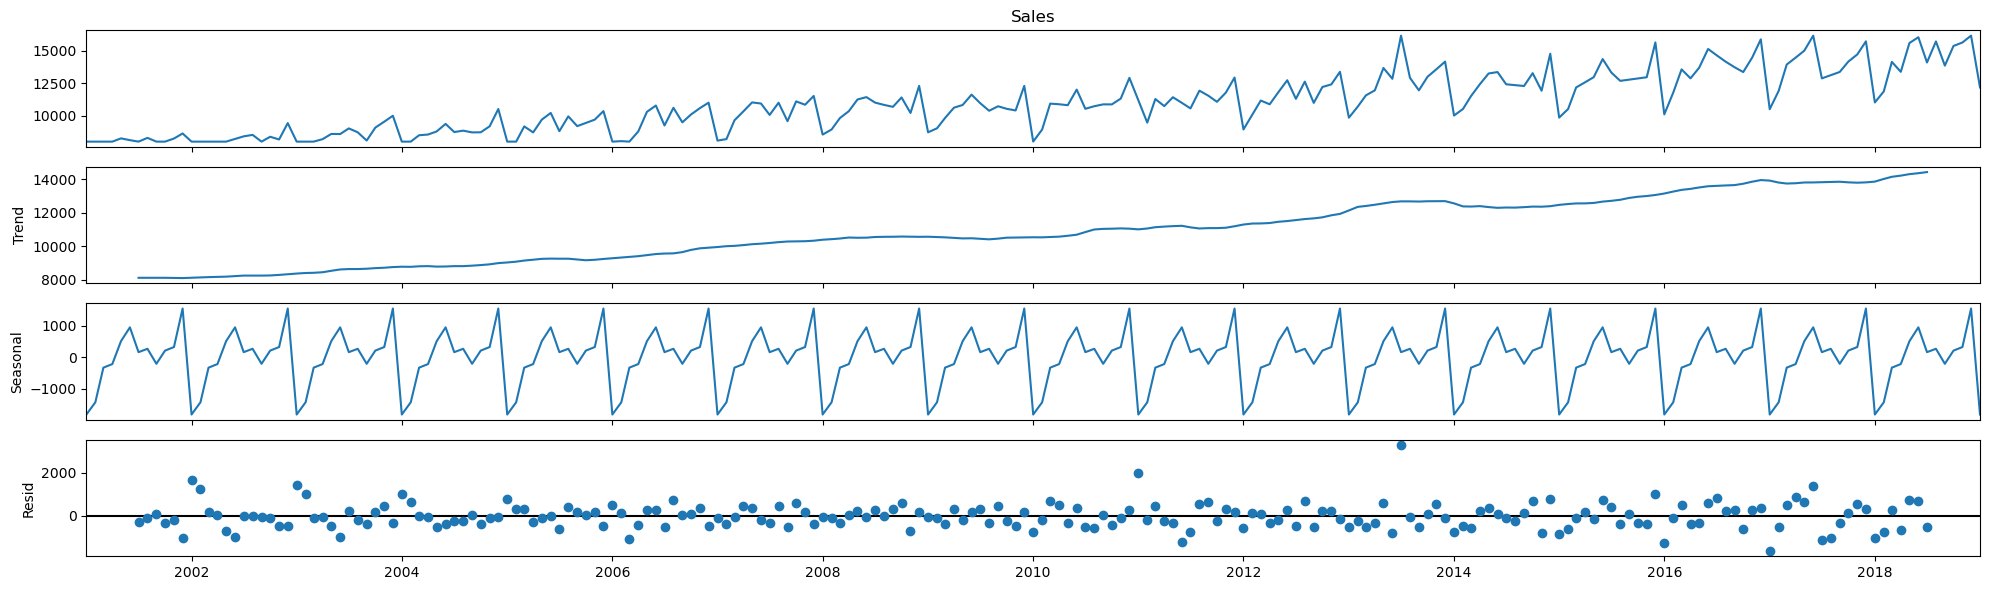

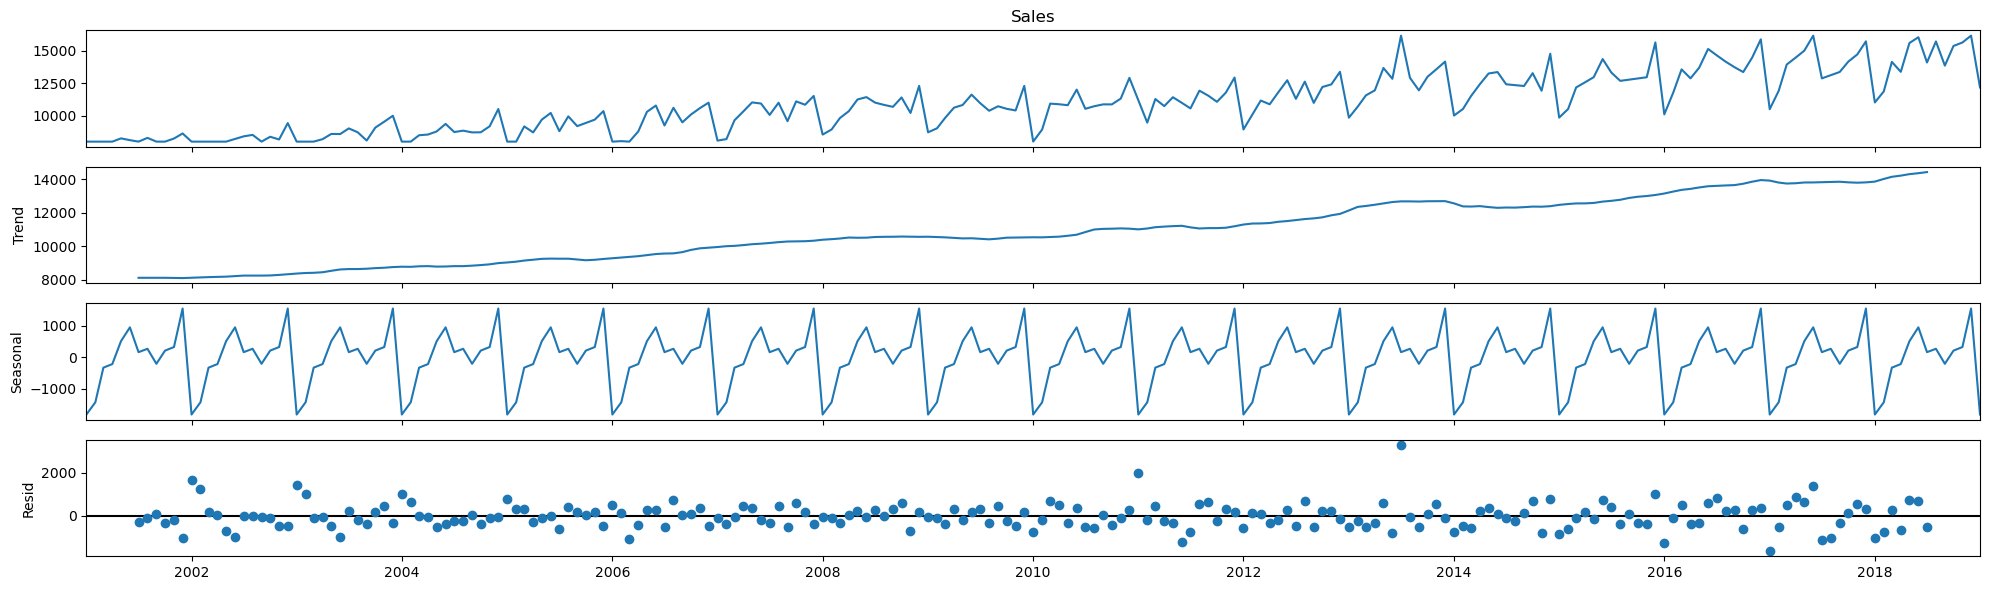

In [95]:
model.plot()

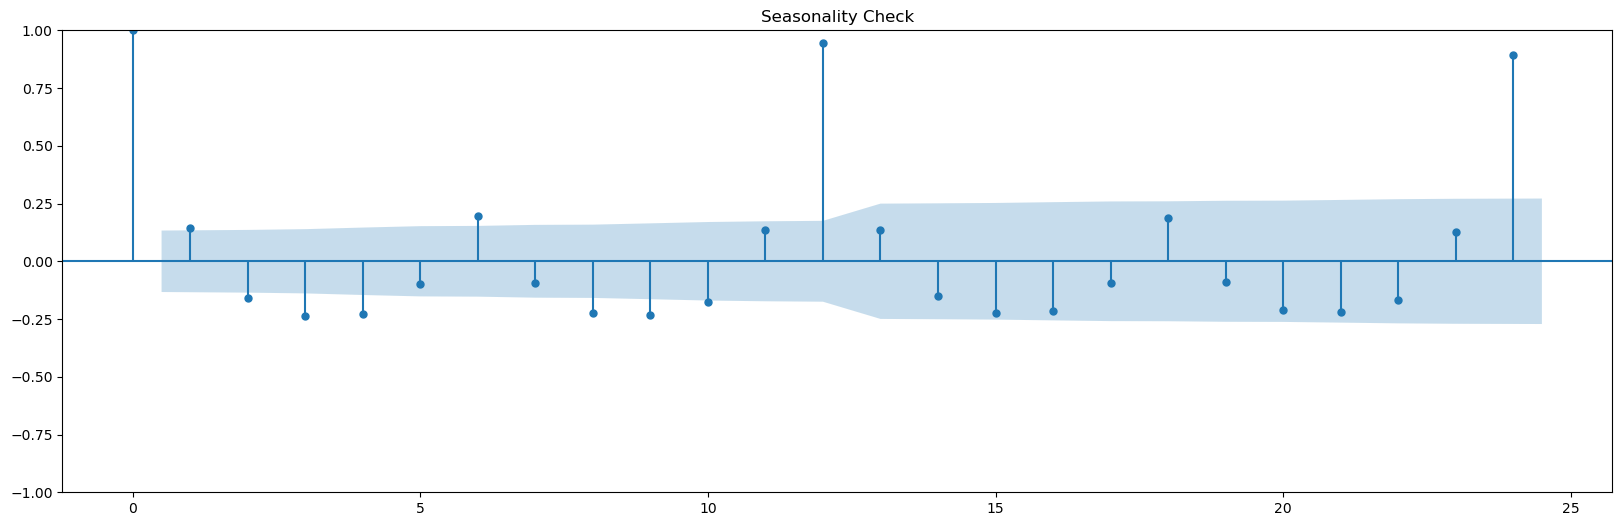

In [96]:
plot_acf(model.seasonal.dropna())
plt.title('Seasonality Check')
plt.show()

# AR(P)

In [97]:
train_x_st = train_x.copy()
train_x_st['Sales'] = train_x_st['Sales'].diff(1)
train_x_st.dropna(inplace=True)
train_x_st

Sales
DATE              
2001-02-01     0.0
2001-03-01     0.0
2001-04-01     0.0
2001-05-01   249.0
2001-06-01  -136.0
...            ...
2017-09-01   246.5
2017-10-01   801.0
2017-11-01   548.0
2017-12-01  1006.0
2018-01-01 -4699.0

[204 rows x 1 columns]

<Axes: xlabel='DATE'>

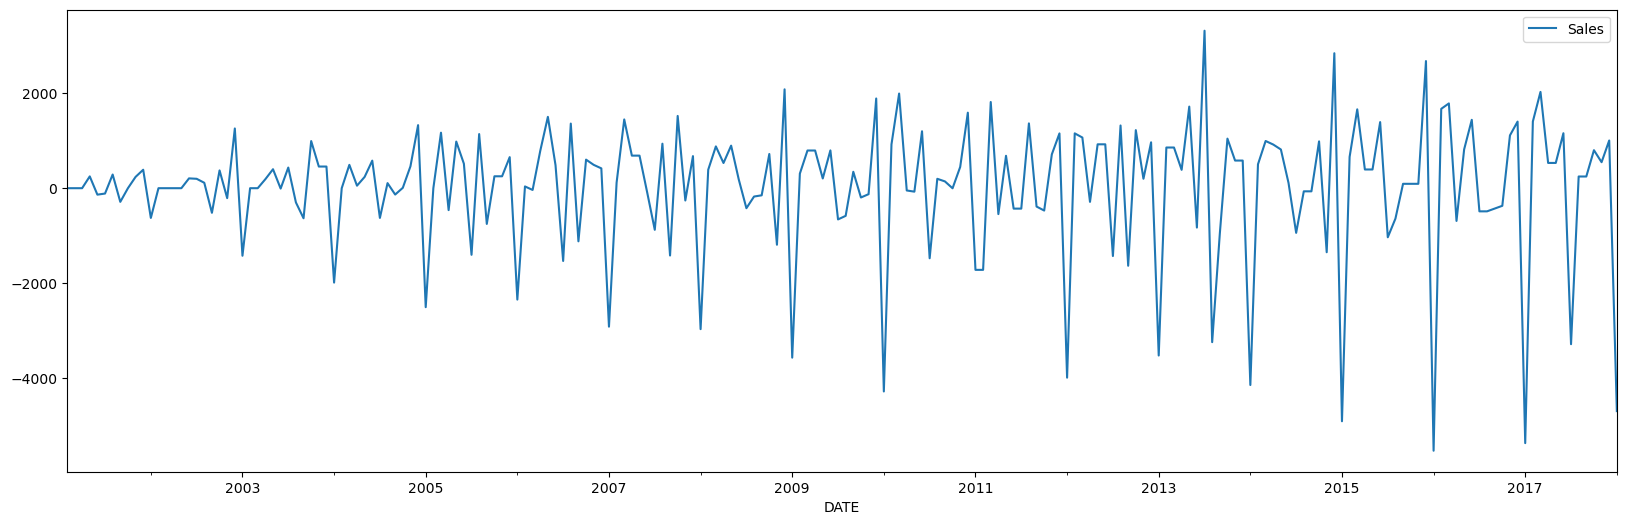

In [98]:
train_x_st.plot()

In [99]:
adf_test(train_x_st)

TS is stationary 3.2295573389248808e-06


In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [101]:
model = SARIMAX(train_x_st['Sales'],order=[25,0,0]) #[p,d,q]
model = model.fit(disp=False)
test_x['pred']=model.forecast(12)
# Integerting it back to non statinary.
test_x['pred'] =test_x['pred'].cumsum()+train_x['Sales'][-1]

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE  : 809.805
RMSE : 959.855
MAPE : 0.056 %


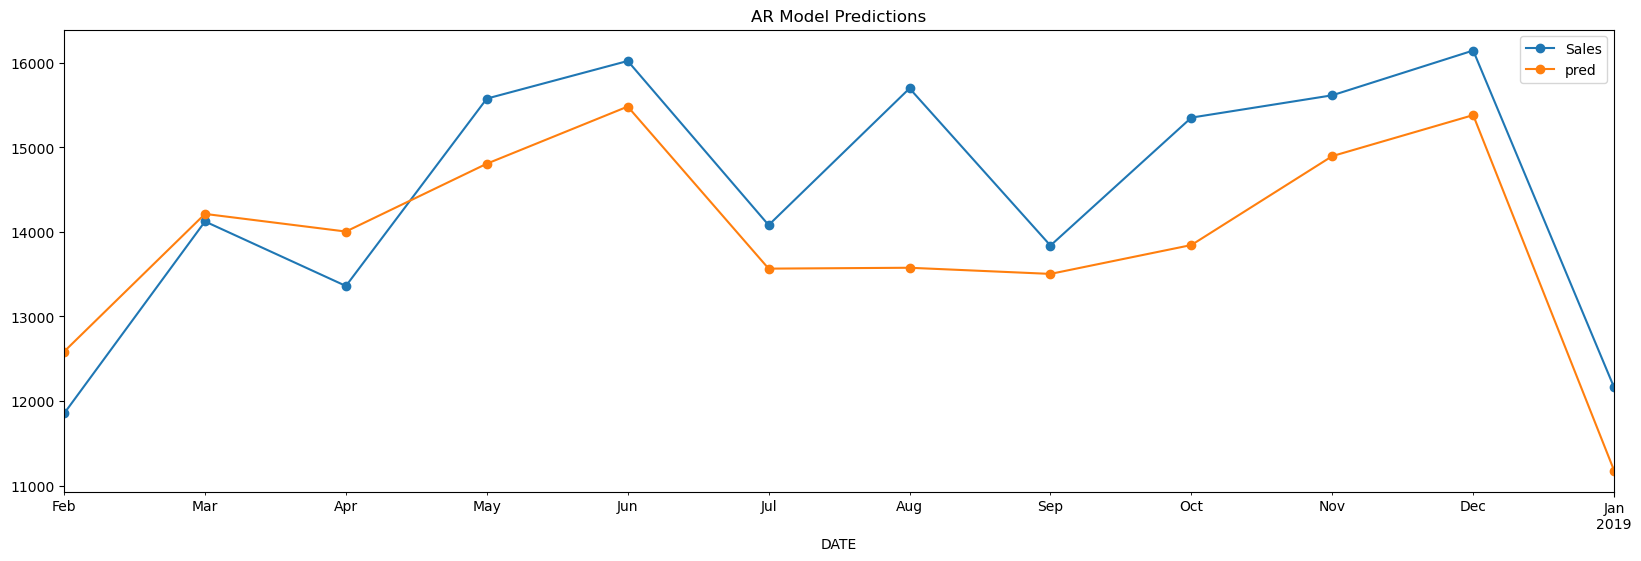

In [102]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('AR Model Predictions')
plt.show()

# MA(q)

In [103]:
model = SARIMAX(train_x_st['Sales'],order=[0,0,12]) #[p,d,q]
model = model.fit(disp=False)
test_x['pred']=model.forecast(12)
# Integerting it back to non statinary.
test_x['pred'] =test_x['pred'].cumsum()+train_x['Sales'][-1]

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE  : 696.385
RMSE : 983.965
MAPE : 0.051 %


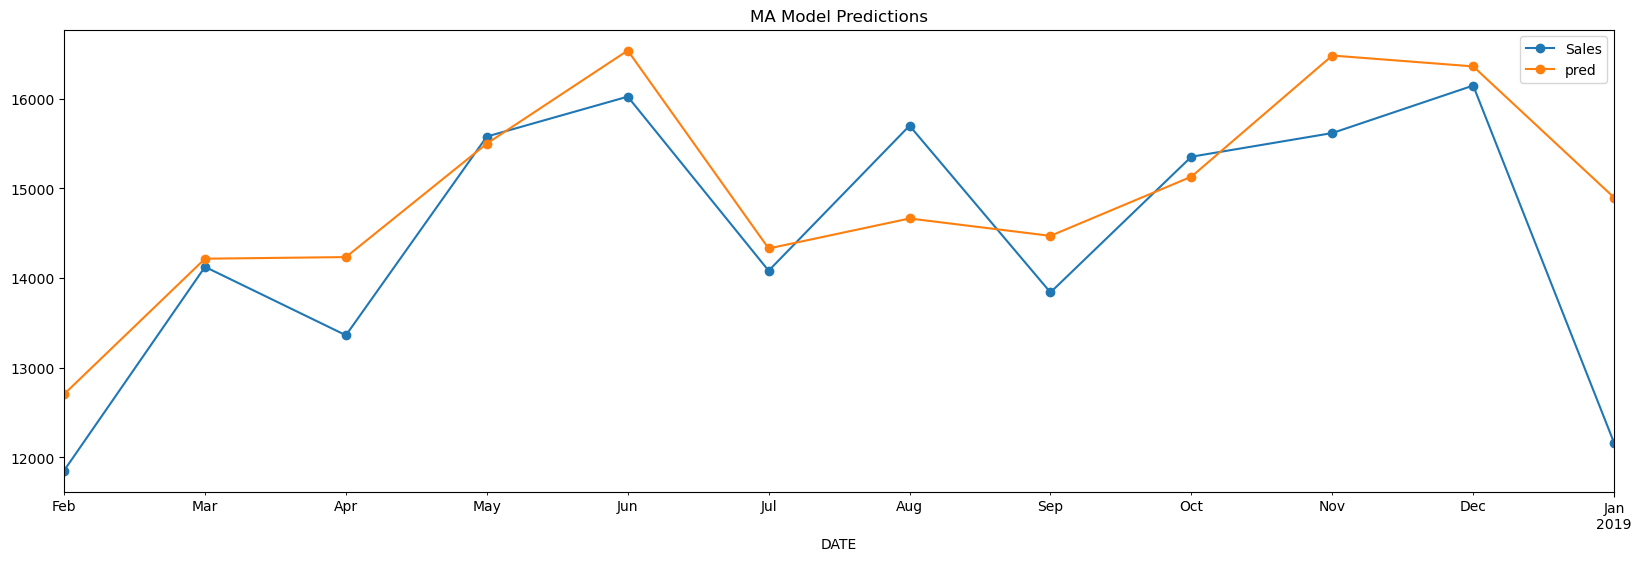

In [104]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('MA Model Predictions')
plt.show()

# ARMA(p,q)

In [105]:
model = SARIMAX(train_x_st['Sales'],order=[25,0,25]) #[p,d,q]
model = model.fit(disp=False)
test_x['pred']=model.forecast(12)
# Integerting it back to non statinary.
test_x['pred'] =test_x['pred'].cumsum()+train_x['Sales'][-1]

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum L

MAE  : 724.934
RMSE : 864.773
MAPE : 0.05 %


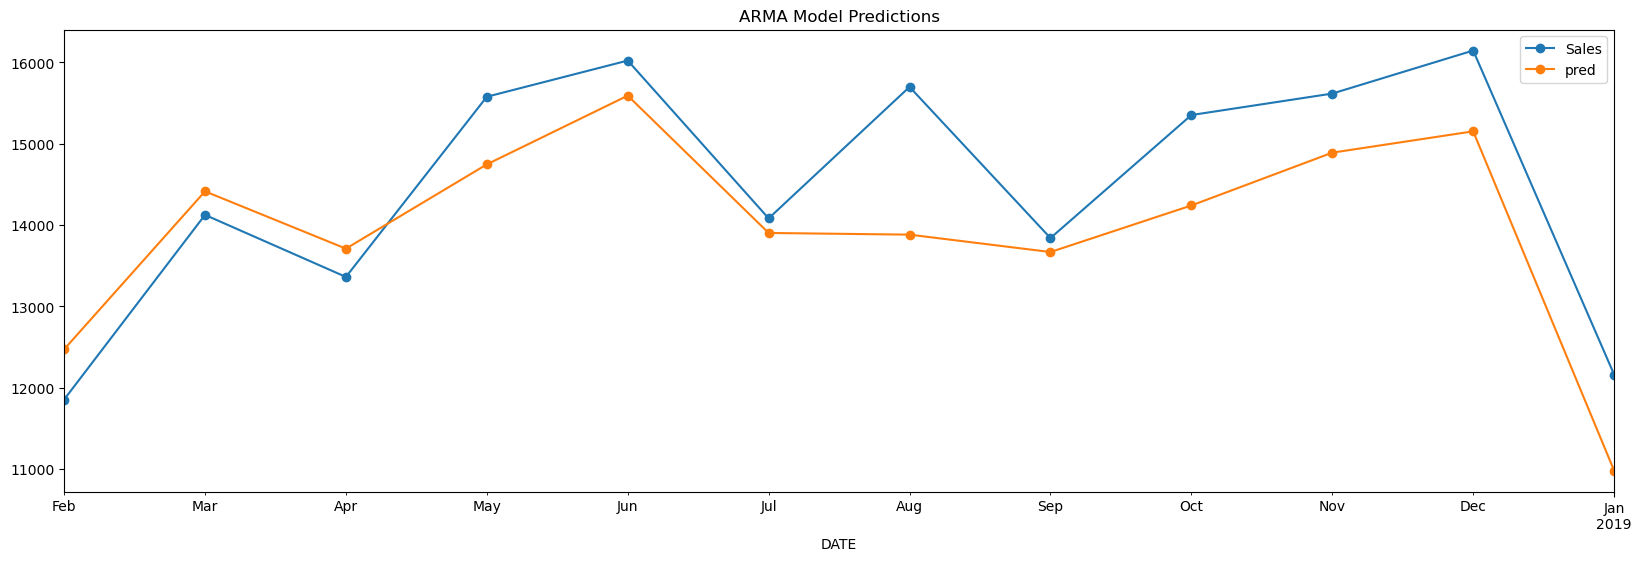

In [106]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('ARMA Model Predictions')
plt.show()

# ARIMA

In [107]:
model = SARIMAX(train_x['Sales'],order=[15,1,15]) #[p,d,q]
model = model.fit(disp=False)
test_x['pred']=model.forecast(12)
# Integerting it back to non statinary.
#test_x['pred'] =test_x['pred'].cumsum()+train_x['Sales'][-1]

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum L

MAE  : 660.067
RMSE : 752.728
MAPE : 0.046 %


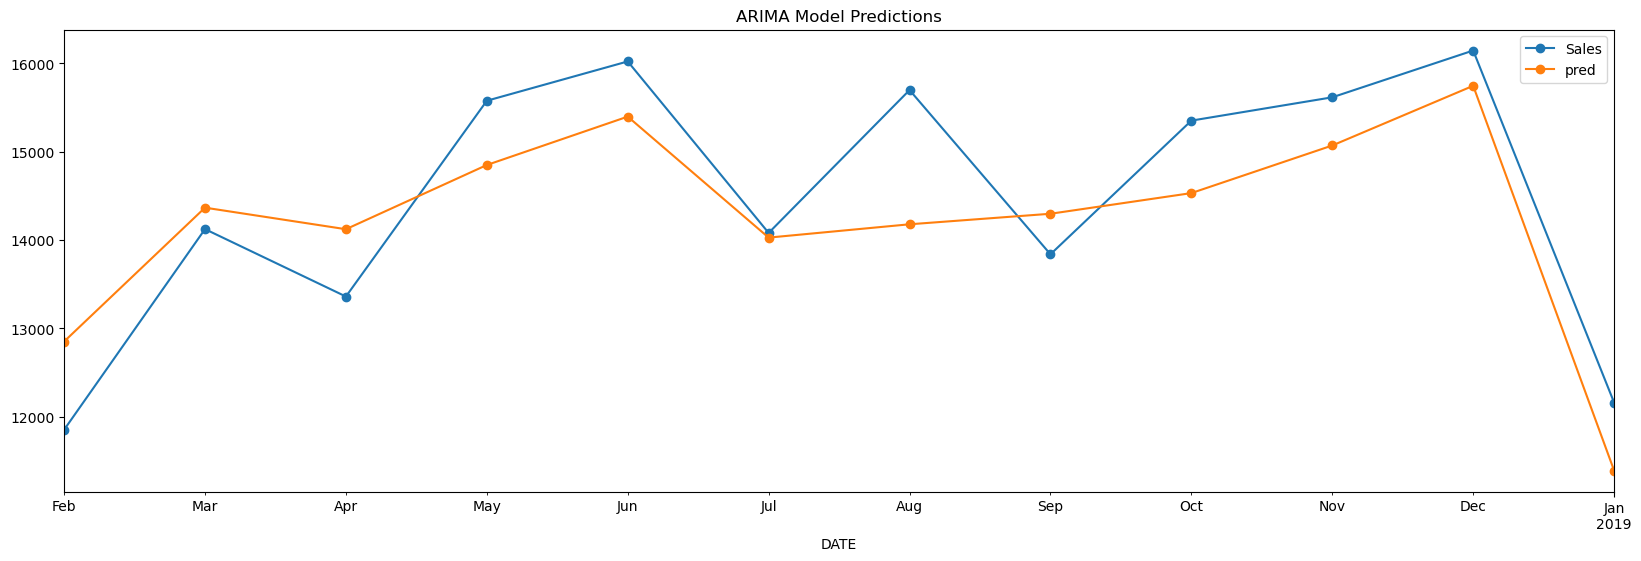

In [108]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('ARIMA Model Predictions')
plt.show()

# SARIMA (p,d,q,P,D,Q,S)

In [109]:
model = SARIMAX(train_x['Sales'],order=(5,1,3),seasonal_order=(2,1,2,12)) #[p,d,q], [P,D,Q,S]
model = model.fit(disp=False)
test_x['pred']=model.forecast(12)
# Integerting it back to non statinary.
#test_x['pred'] =test_x['pred'].cumsum()+train_x['Sales'][-1]

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE  : 585.971
RMSE : 696.67
MAPE : 0.041 %


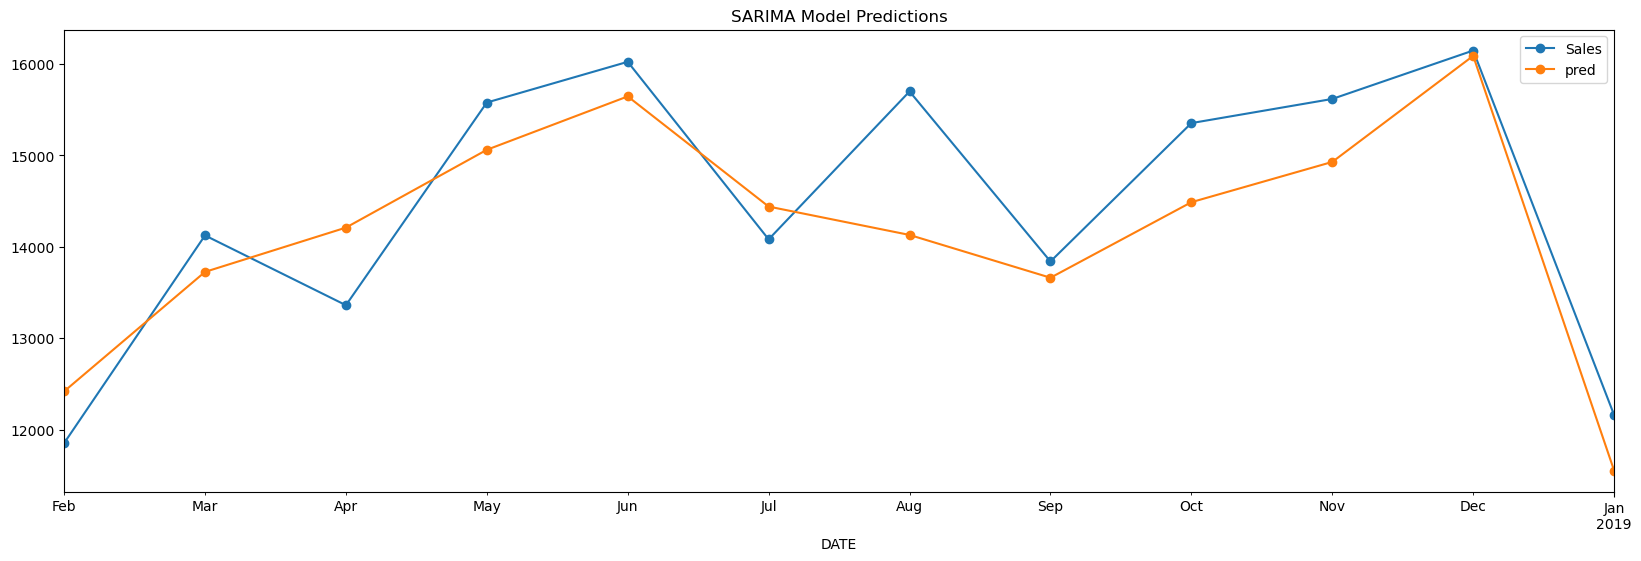

In [110]:
test_x.plot(style='-o')
performance(test_x['Sales'],test_x['pred'])
plt.title('SARIMA Model Predictions')
plt.show()

# Confidence Interval

In [111]:
test_x[['lower','upper']] = model.get_forecast(steps=12).conf_int(0.5)

In [112]:
test_x['actual_pred'] = model.forecast(steps=12)

In [113]:
test_x

Sales          pred         lower         upper   actual_pred
DATE                                                                        
2018-02-01  11852.00  12417.760795  10869.579390  13965.942200  12417.760795
2018-03-01  14123.00  13724.164449  12138.118917  15310.209981  13724.164449
2018-04-01  13360.00  14208.331946  12591.932254  15824.731638  14208.331946
2018-05-01  15576.00  15059.182973  13437.374545  16680.991401  15059.182973
2018-06-01  16021.00  15642.991105  14019.652906  17266.329304  15642.991105
2018-07-01  14080.00  14438.391785  12814.990681  16061.792889  14438.391785
2018-08-01  15697.00  14128.200747  12502.653937  15753.747557  14128.200747
2018-09-01  13838.00  13660.388210  12034.873914  15285.902505  13660.388210
2018-10-01  15351.00  14486.208931  12860.699333  16111.718529  14486.208931
2018-11-01  15615.00  14926.481756  13299.413018  16553.550494  14926.481756
2018-12-01  16144.48  16086.080018  14458.900244  17713.259792  16086.080018
2019-01-01  12160.00  11552.612885   9925.486845  13179.738925  11552.612885

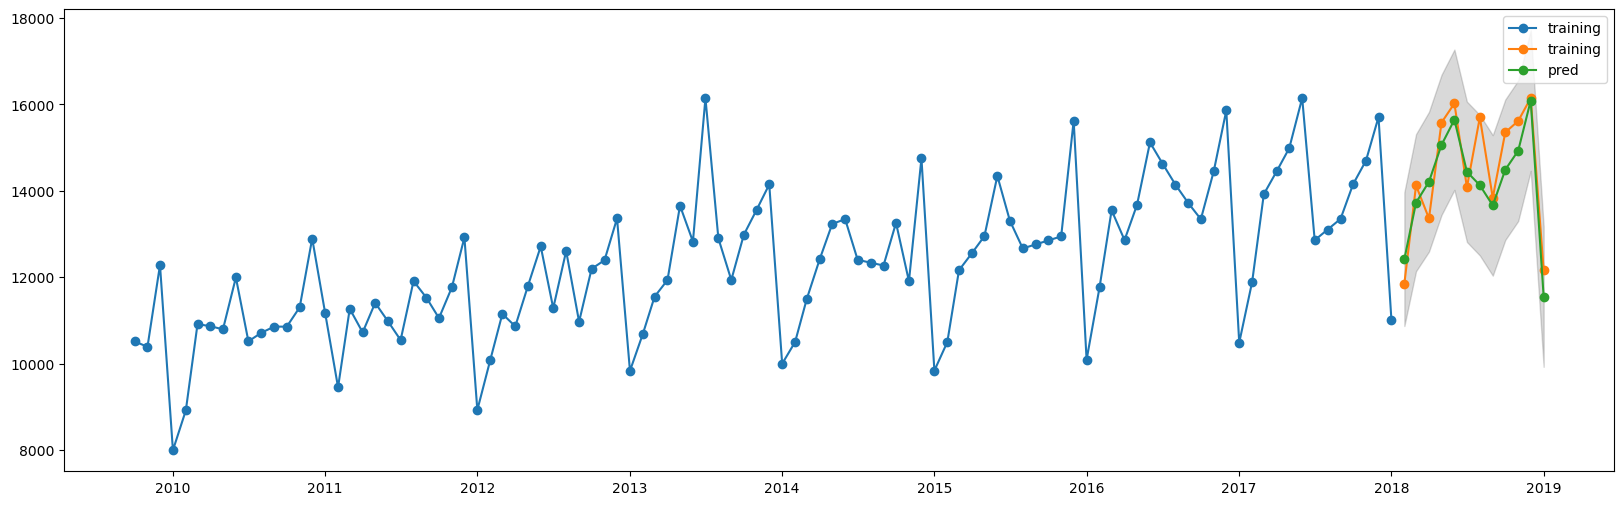

In [114]:
plt.plot(train_x['Sales'][-100:],'-o',label='training')
plt.plot(test_x['Sales'],'-o',label='training')
plt.plot(test_x['pred'],'-o',label='pred')

# This is used for CI plot
plt.fill_between(test_x.index,test_x['lower'],test_x['upper'],color='k',alpha=.15)
plt.legend()
plt.show()

# External Variable Factor 

In [115]:
df = pd.read_csv('exog.csv')

In [116]:
df

date    weekday  holiday  total
0     1/1/2016     Friday        1  296.0
1     1/2/2016   Saturday        0  191.0
2     1/3/2016     Sunday        0  202.0
3     1/4/2016     Monday        0  105.0
4     1/5/2016    Tuesday        0   98.0
..         ...        ...      ...    ...
512  5/27/2017   Saturday        0    NaN
513  5/28/2017     Sunday        0    NaN
514  5/29/2017     Monday        1    NaN
515  5/30/2017    Tuesday        0    NaN
516  5/31/2017  Wednesday        0    NaN

[517 rows x 4 columns]

In [117]:
df.isna().sum()

date        0
weekday     0
holiday     0
total      39
dtype: int64

In [118]:
df.dropna(inplace=True)

In [119]:
df

date    weekday  holiday  total
0     1/1/2016     Friday        1  296.0
1     1/2/2016   Saturday        0  191.0
2     1/3/2016     Sunday        0  202.0
3     1/4/2016     Monday        0  105.0
4     1/5/2016    Tuesday        0   98.0
..         ...        ...      ...    ...
473  4/18/2017    Tuesday        0   91.0
474  4/19/2017  Wednesday        0   79.0
475  4/20/2017   Thursday        0   90.0
476  4/21/2017     Friday        0  165.0
477  4/22/2017   Saturday        0  226.0

[478 rows x 4 columns]

In [120]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

weekday  holiday  total
date                                
2016-01-01    Friday        1  296.0
2016-01-02  Saturday        0  191.0
2016-01-03    Sunday        0  202.0
2016-01-04    Monday        0  105.0
2016-01-05   Tuesday        0   98.0

<Axes: xlabel='date'>

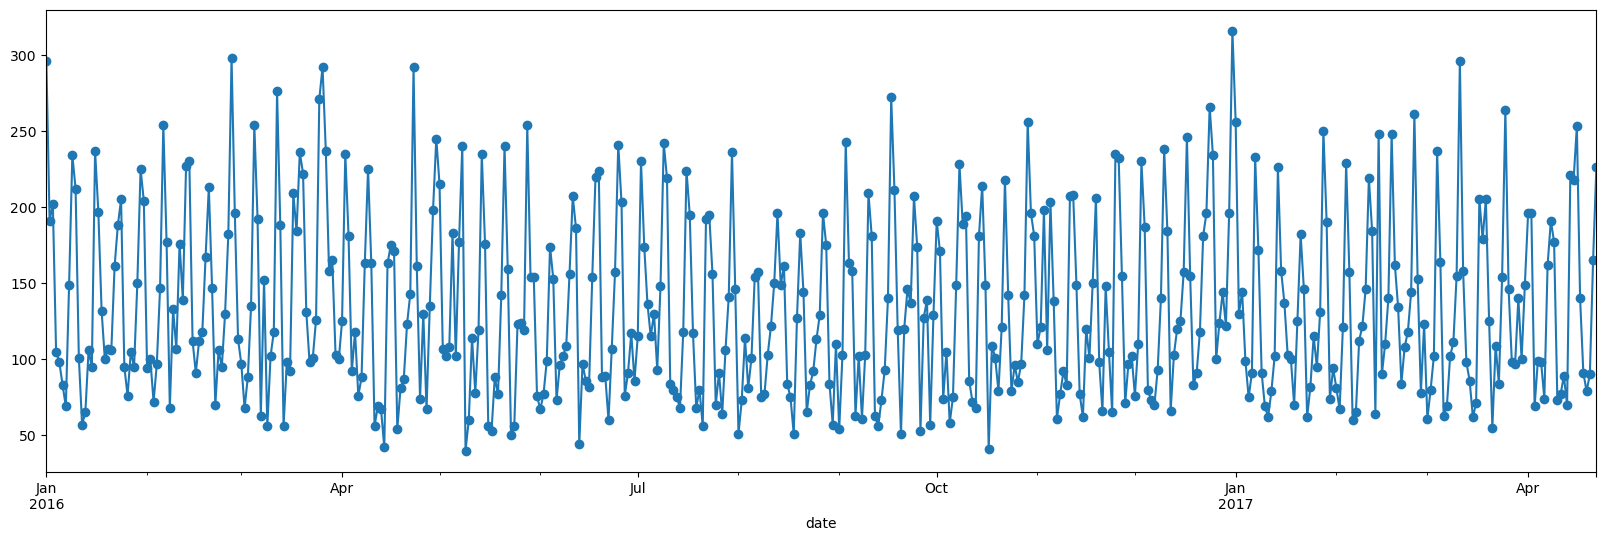

In [121]:
df['total'].plot(style='-o')

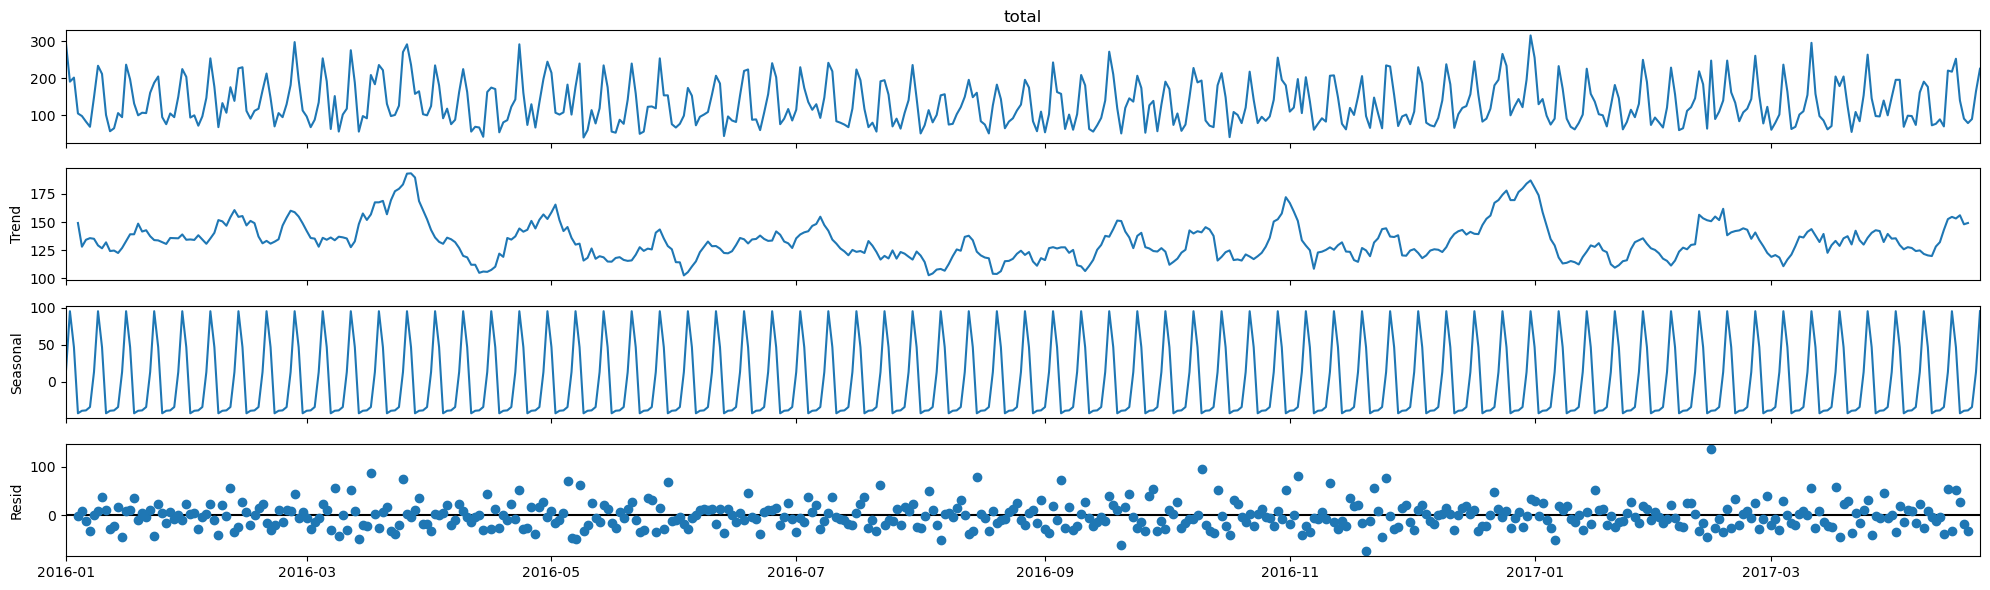

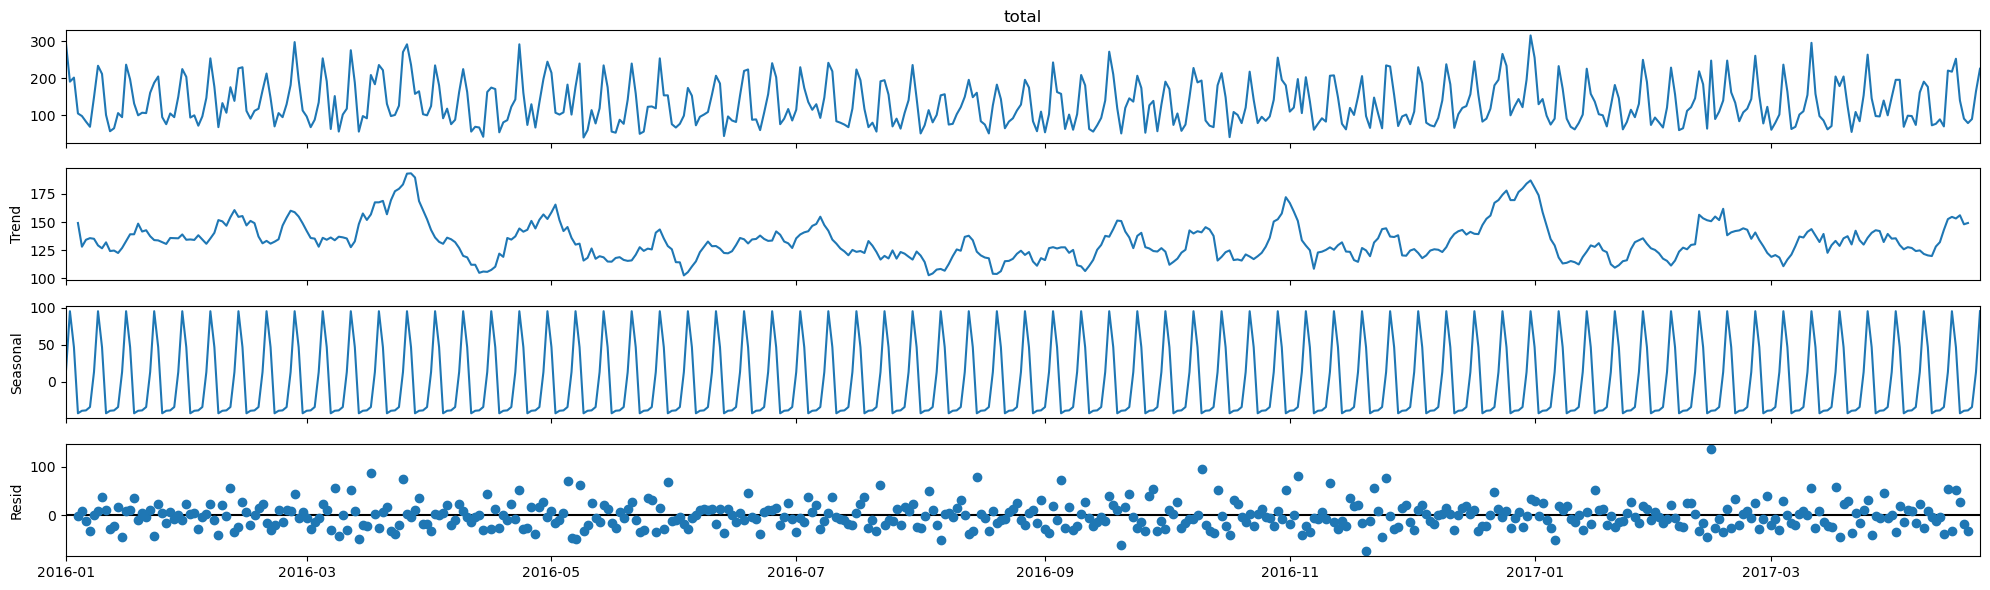

In [122]:
sm.tsa.seasonal_decompose(df['total']).plot()

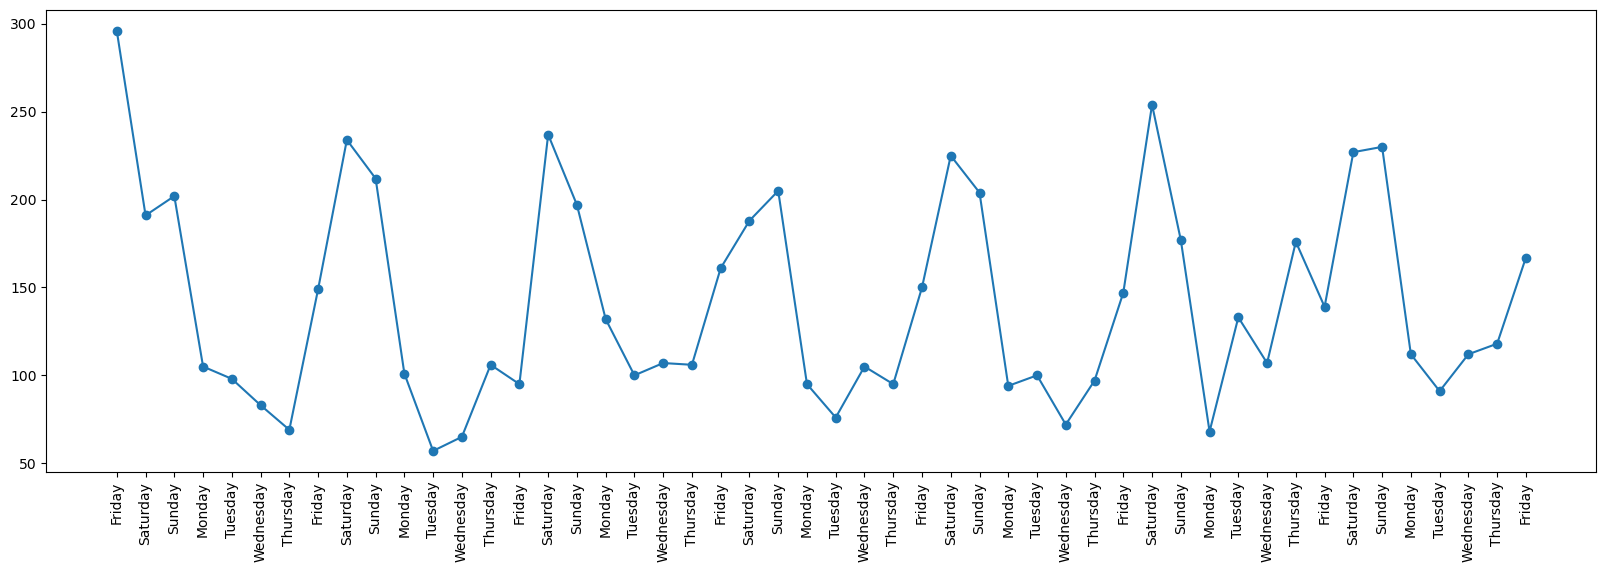

In [123]:
plt.plot(range(50),df['total'][:50],'-o')
plt.xticks(range(0,50),df['weekday'][:50],rotation=90)
plt.show()

In [124]:
train = df.iloc[:436]
test = df.iloc[436:]

In [125]:
train

weekday  holiday  total
date                                 
2016-01-01     Friday        1  296.0
2016-01-02   Saturday        0  191.0
2016-01-03     Sunday        0  202.0
2016-01-04     Monday        0  105.0
2016-01-05    Tuesday        0   98.0
...               ...      ...    ...
2017-03-07    Tuesday        0   69.0
2017-03-08  Wednesday        0  102.0
2017-03-09   Thursday        0  111.0
2017-03-10     Friday        0  155.0
2017-03-11   Saturday        0  296.0

[436 rows x 3 columns]

In [126]:
test

weekday  holiday  total
date                                 
2017-03-12     Sunday        0  158.0
2017-03-13     Monday        0   98.0
2017-03-14    Tuesday        0   86.0
2017-03-15  Wednesday        0   62.0
2017-03-16   Thursday        0   71.0
2017-03-17     Friday        1  205.0
2017-03-18   Saturday        0  179.0
2017-03-19     Sunday        0  205.0
2017-03-20     Monday        0  125.0
2017-03-21    Tuesday        0   55.0
2017-03-22  Wednesday        0  109.0
2017-03-23   Thursday        0   84.0
2017-03-24     Friday        0  154.0
2017-03-25   Saturday        0  264.0
2017-03-26     Sunday        0  146.0
2017-03-27     Monday        0   98.0
2017-03-28    Tuesday        0   97.0
2017-03-29  Wednesday        0  140.0
2017-03-30   Thursday        0  100.0
2017-03-31     Friday        0  149.0
2017-04-01   Saturday        0  196.0
2017-04-02     Sunday        0  196.0
2017-04-03     Monday        0   69.0
2017-04-04    Tuesday        0   99.0
2017-04-05  Wednesday        0   98.0
2017-04-06   Thursday        0   74.0
2017-04-07     Friday        0  162.0
2017-04-08   Saturday        0  191.0
2017-04-09     Sunday        0  177.0
2017-04-10     Monday        0   73.0
2017-04-11    Tuesday        0   77.0
2017-04-12  Wednesday        0   89.0
2017-04-13   Thursday        0   70.0
2017-04-14     Friday        1  221.0
2017-04-15   Saturday        0  218.0
2017-04-16     Sunday        1  253.0
2017-04-17     Monday        1  140.0
2017-04-18    Tuesday        0   91.0
2017-04-19  Wednesday        0   79.0
2017-04-20   Thursday        0   90.0
2017-04-21     Friday        0  165.0
2017-04-22   Saturday        0  226.0

In [127]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(1,0,1,7))
res = model.fit(disp=False)
fc = res.forecast(42)

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [128]:
st = len(train)
end = len(train) + len(test) -1
pred = res.predict(start=st,end=end)

In [129]:
performance(test['total'],pred)

MAE  : 25.154
RMSE : 31.966
MAPE : 0.202 %


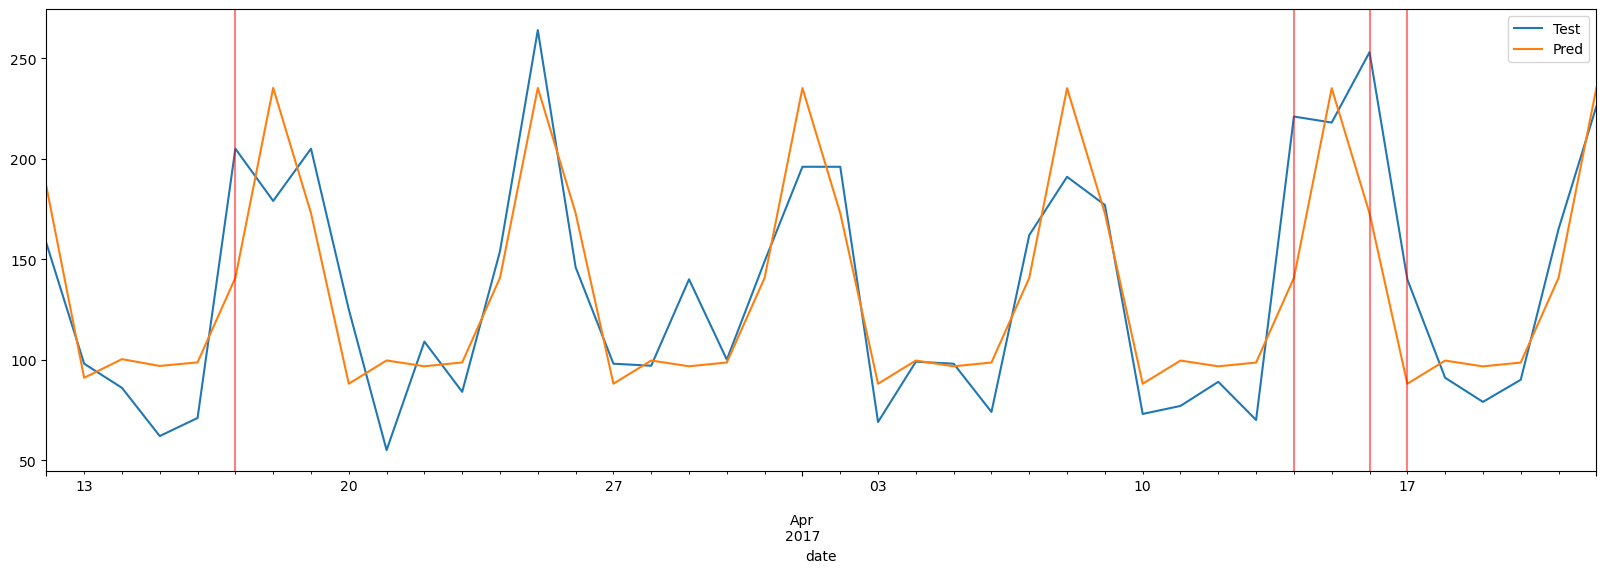

In [130]:
ax = test['total'].plot(label='Test')
plt.plot(pred,label='Pred')
plt.legend()
ax.autoscale(axis='x',tight=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='red',alpha=0.5)
plt.show()

In [131]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7))
res = model.fit(disp=False)

C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gaura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [132]:
pred = res.predict(start=st,end=end,exog=test[['holiday']]).rename('PRed')

In [133]:
performance(test['total'],pred)

MAE  : 18.904
RMSE : 23.264
MAPE : 0.163 %


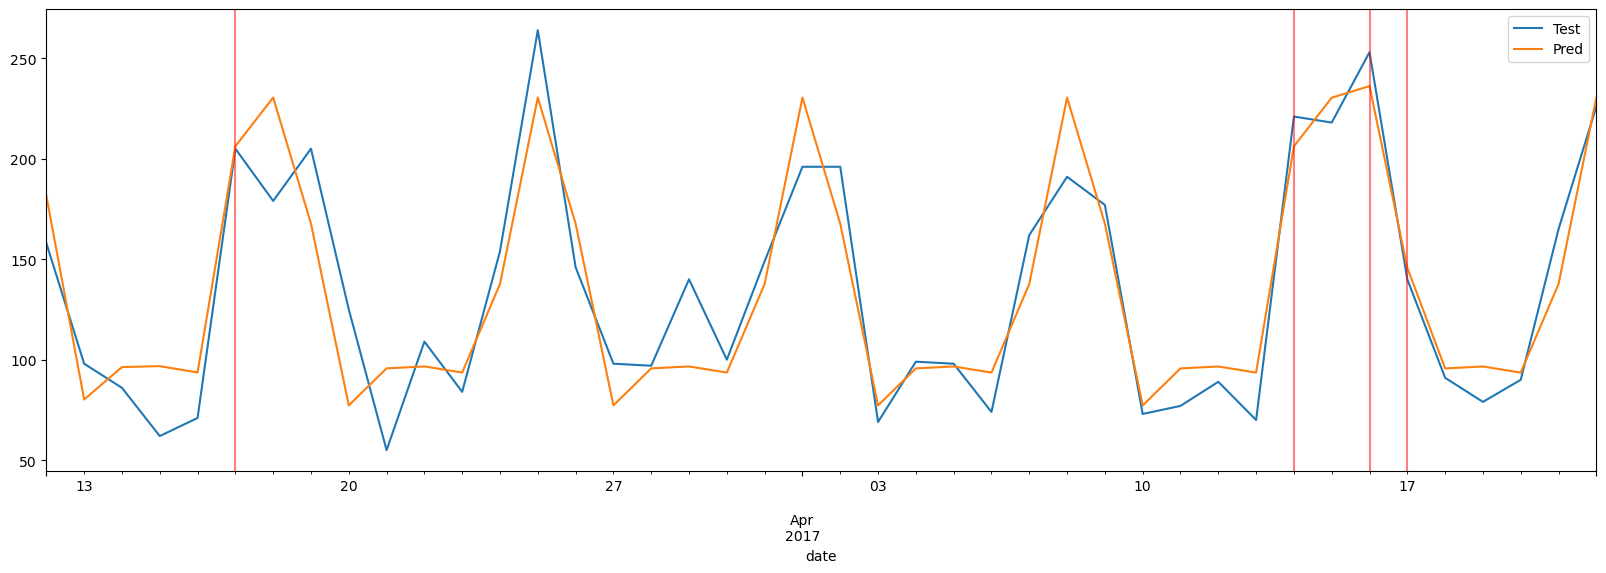

In [134]:
ax = test['total'].plot(label='Test')
plt.plot(pred,label='Pred')
plt.legend()
ax.autoscale(axis='x',tight=True)
for x in test.query('holiday==1').index:
    ax.axvline(x=x,color='red',alpha=0.5)
plt.show()

# Change Point 

In [138]:
def plot_changepoint(signal,changepoints):
    for cp in changepoints:
        plt.axvline(x=cp,color='#FA8072')
    plt.plot()
    
    start = 0
    trends = np.array([])
    for i in changepoints:
        x = np.arange(start,i)
        y = signal[start:i]
        l1 = np.polyfit(x,y,deg=1) # try to fit polynomial line of degree one.
        trend = x*l1[0]+l1[1]
        trends = np.append(trends,trend)
        start=i
    plt.plot(trends,label='trend')
    plt.legend()
    plt.show()

[121, 139, 163, 175]


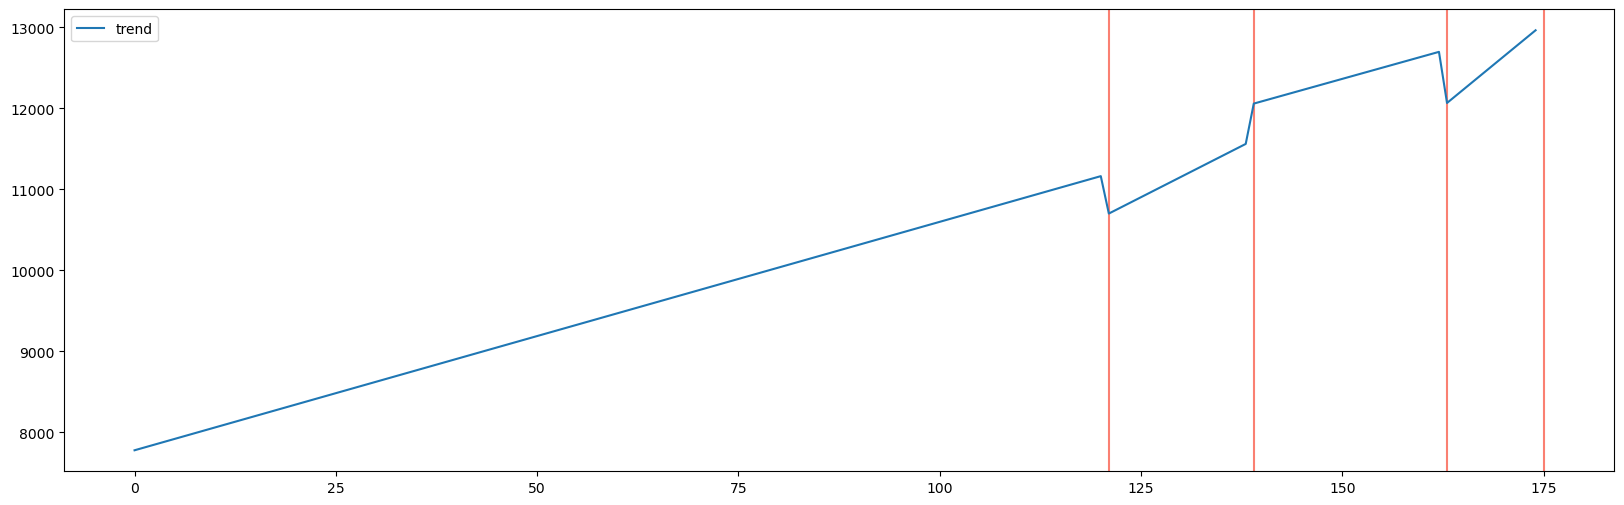

In [172]:
signal = train_x['Sales']
window = 60
def get_slope(y):
    return np.polyfit(np.arange(len(y)),y,deg=1)[0]
changepoints = signal.loc[abs(signal.rolling(window,center=True).apply(get_slope).diff())>7.5].index

temp = signal.reset_index()
change_point = temp.loc[temp['DATE'].isin(changepoints)].index.tolist()
print(change_point)
plot_changepoint(signal.values,change_point)